<a href="https://colab.research.google.com/github/rustiiiiiii/CytoAutoCluster_Infosys_Internship_Oct2024/blob/Aman_jayswal/CytoAutoCluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import required Library

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew, kurtosis

# To display plots inline in the notebook
%matplotlib inline

# Set plot styles
sns.set(style="whitegrid")





First mount drive with colab to read dataset, create daataframe  and drop irrelevent column

In [ ]:
#Loading data into a DataFrame
data=pd.read_csv('drive/MyDrive/Dataset.csv')
df = pd.DataFrame(data)
df.drop(['Event', 'Time','file_number','event_number'] , axis=1, inplace=True)
#df.drop('Age', axis=1, inplace=True)


It provides a concise summary of a DataFrame

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265627 entries, 0 to 265626
Data columns (total 38 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Cell_length  265627 non-null  int64  
 1   DNA1         265627 non-null  float64
 2   DNA2         265627 non-null  float64
 3   CD45RA       265627 non-null  float64
 4   CD133        265627 non-null  float64
 5   CD19         265627 non-null  float64
 6   CD22         265627 non-null  float64
 7   CD11b        265627 non-null  float64
 8   CD4          265627 non-null  float64
 9   CD8          265627 non-null  float64
 10  CD34         265627 non-null  float64
 11  Flt3         265627 non-null  float64
 12  CD20         265627 non-null  float64
 13  CXCR4        265627 non-null  float64
 14  CD235ab      265627 non-null  float64
 15  CD45         265627 non-null  float64
 16  CD123        265627 non-null  float64
 17  CD321        265627 non-null  float64
 18  CD14         265627 non-

Print Shape of dataset

In [ ]:
print(df.shape)


(265627, 38)


It generates descriptive statistics for a DataFrame’s numerical columns.

In [ ]:
print(df.describe())


         Cell_length           DNA1           DNA2         CD45RA  \
count  265627.000000  265627.000000  265627.000000  265627.000000   
mean       34.450572       4.606956       5.198308       0.688127   
std        11.446694       1.312831       1.150357       0.609105   
min        10.000000       2.786488       2.236450      -0.057305   
25%        26.000000       3.700023       4.407822       0.204625   
50%        33.000000       4.022127       4.698415       0.549387   
75%        41.000000       6.353313       6.766268       1.031198   
max        65.000000       7.001489       7.472308       6.691197   

               CD133           CD19           CD22          CD11b  \
count  265627.000000  265627.000000  265627.000000  265627.000000   
mean        0.145960       0.509301       0.397323       0.710319   
std         0.259267       0.857462       0.762126       1.011434   
min        -0.058081      -0.058089      -0.057342      -0.058236   
25%        -0.022935      -0.0188

 check null values and not null values and plot it

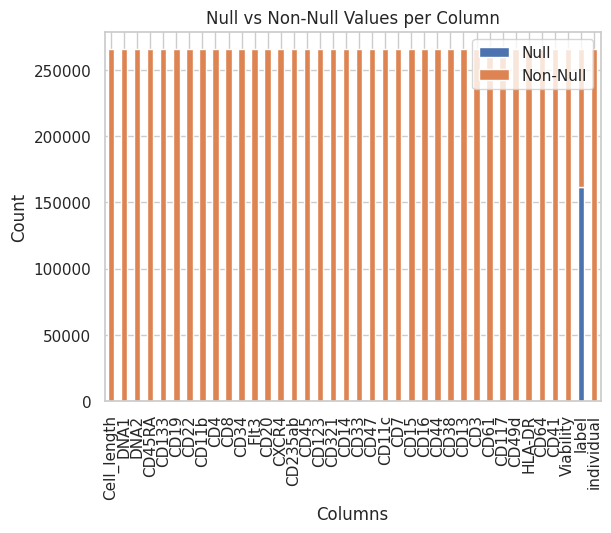

In [ ]:

null_counts = df.isnull().sum()
non_null_counts = df.notnull().sum()

# Create a new DataFrame for plotting
counts_df = pd.DataFrame({
    'Null': null_counts,
    'Non-Null': non_null_counts
})

# Plot the stacked bar chart
counts_df.plot(kind='bar', stacked=True)

# Add title and labels
plt.title('Null vs Non-Null Values per Column')
plt.ylabel('Count')
plt.xlabel('Columns')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

Cell_length         0
DNA1                0
DNA2                0
CD45RA              0
CD133               0
CD19                0
CD22                0
CD11b               0
CD4                 0
CD8                 0
CD34                0
Flt3                0
CD20                0
CXCR4               0
CD235ab             0
CD45                0
CD123               0
CD321               0
CD14                0
CD33                0
CD47                0
CD11c               0
CD7                 0
CD15                0
CD16                0
CD44                0
CD38                0
CD13                0
CD3                 0
CD61                0
CD117               0
CD49d               0
HLA-DR              0
CD64                0
CD41                0
Viability           0
label          161443
individual          0
dtype: int64


<Axes: >

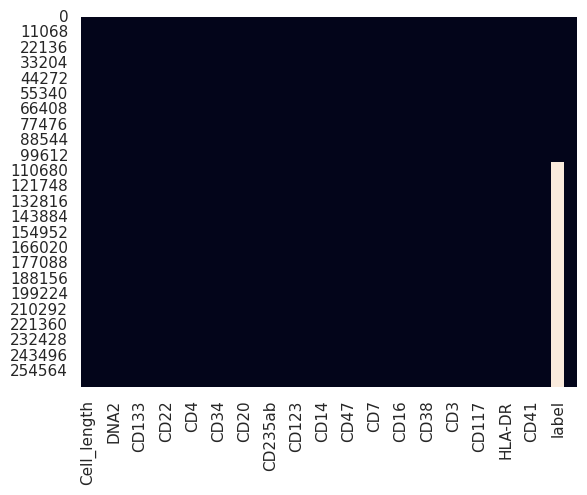

In [ ]:
print(df.isnull().sum())

sns.heatmap(df.isnull(), cbar=False)



Check Range of each column

Range of Numerical Features:
                   Min        Max      Range
Cell_length  10.000000  65.000000  55.000000
DNA1          2.786488   7.001489   4.215001
DNA2          2.236450   7.472308   5.235858
CD45RA       -0.057305   6.691197   6.748502
CD133        -0.058081   5.527494   5.585575
CD19         -0.058089   4.990085   5.048174
CD22         -0.057342   5.160477   5.217819
CD11b        -0.058236   5.260789   5.319025
CD4          -0.057751   6.581762   6.639513
CD8          -0.058003   4.693694   4.751697
CD34         -0.058008   5.147996   5.206004
Flt3         -0.057884   7.117323   7.175207
CD20         -0.058132   6.051411   6.109543
CXCR4        -0.057042   5.696674   5.753717
CD235ab      -0.057612   6.646699   6.704311
CD45          2.040243   7.238076   5.197833
CD123        -0.058003   6.640626   6.698630
CD321        -0.053552   6.867388   6.920940
CD14         -0.057954   5.006121   5.064075
CD33         -0.058079   5.612469   5.670548
CD47         -0.055087   6

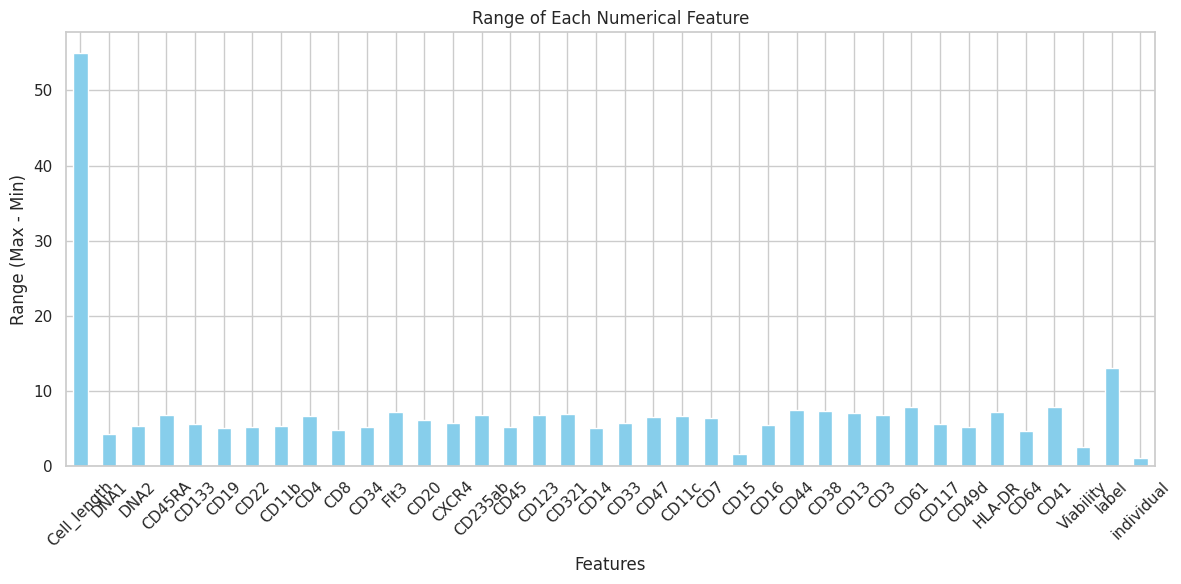

In [ ]:
# Cell 4: Range of each numerical feature (min and max values)
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Calculate range (max - min)
feature_ranges = pd.DataFrame({
    'Min': df[numerical_columns].min(),
    'Max': df[numerical_columns].max(),
    'Range': df[numerical_columns].max() - df[numerical_columns].min()
})

print("Range of Numerical Features:")
print(feature_ranges)

# Optionally plot the range as a bar chart for better visualization
feature_ranges['Range'].plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Range of Each Numerical Feature')
plt.ylabel('Range (Max - Min)')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Correlation Matrix:
             Cell_length      DNA1      DNA2    CD45RA     CD133      CD19  \
Cell_length     1.000000  0.416423  0.431905  0.111393 -0.059958 -0.005861   
DNA1            0.416423  1.000000  0.984877  0.100069 -0.285511 -0.025971   
DNA2            0.431905  0.984877  1.000000  0.104679 -0.277263 -0.026996   
CD45RA          0.111393  0.100069  0.104679  1.000000  0.092387  0.361185   
CD133          -0.059958 -0.285511 -0.277263  0.092387  1.000000  0.094540   
CD19           -0.005861 -0.025971 -0.026996  0.361185  0.094540  1.000000   
CD22           -0.012262 -0.063193 -0.063374  0.359608  0.112904  0.754304   
CD11b           0.008631 -0.000526  0.004155 -0.119707  0.016588 -0.172359   
CD4             0.033517 -0.005337  0.000563 -0.108922 -0.013967 -0.240937   
CD8             0.022215  0.002270  0.006531  0.079826  0.089389 -0.193806   
CD34           -0.014858 -0.050997 -0.051362 -0.059609  0.134702  0.012203   
Flt3           -0.005296 -0.177849 -0.16984

<Axes: >

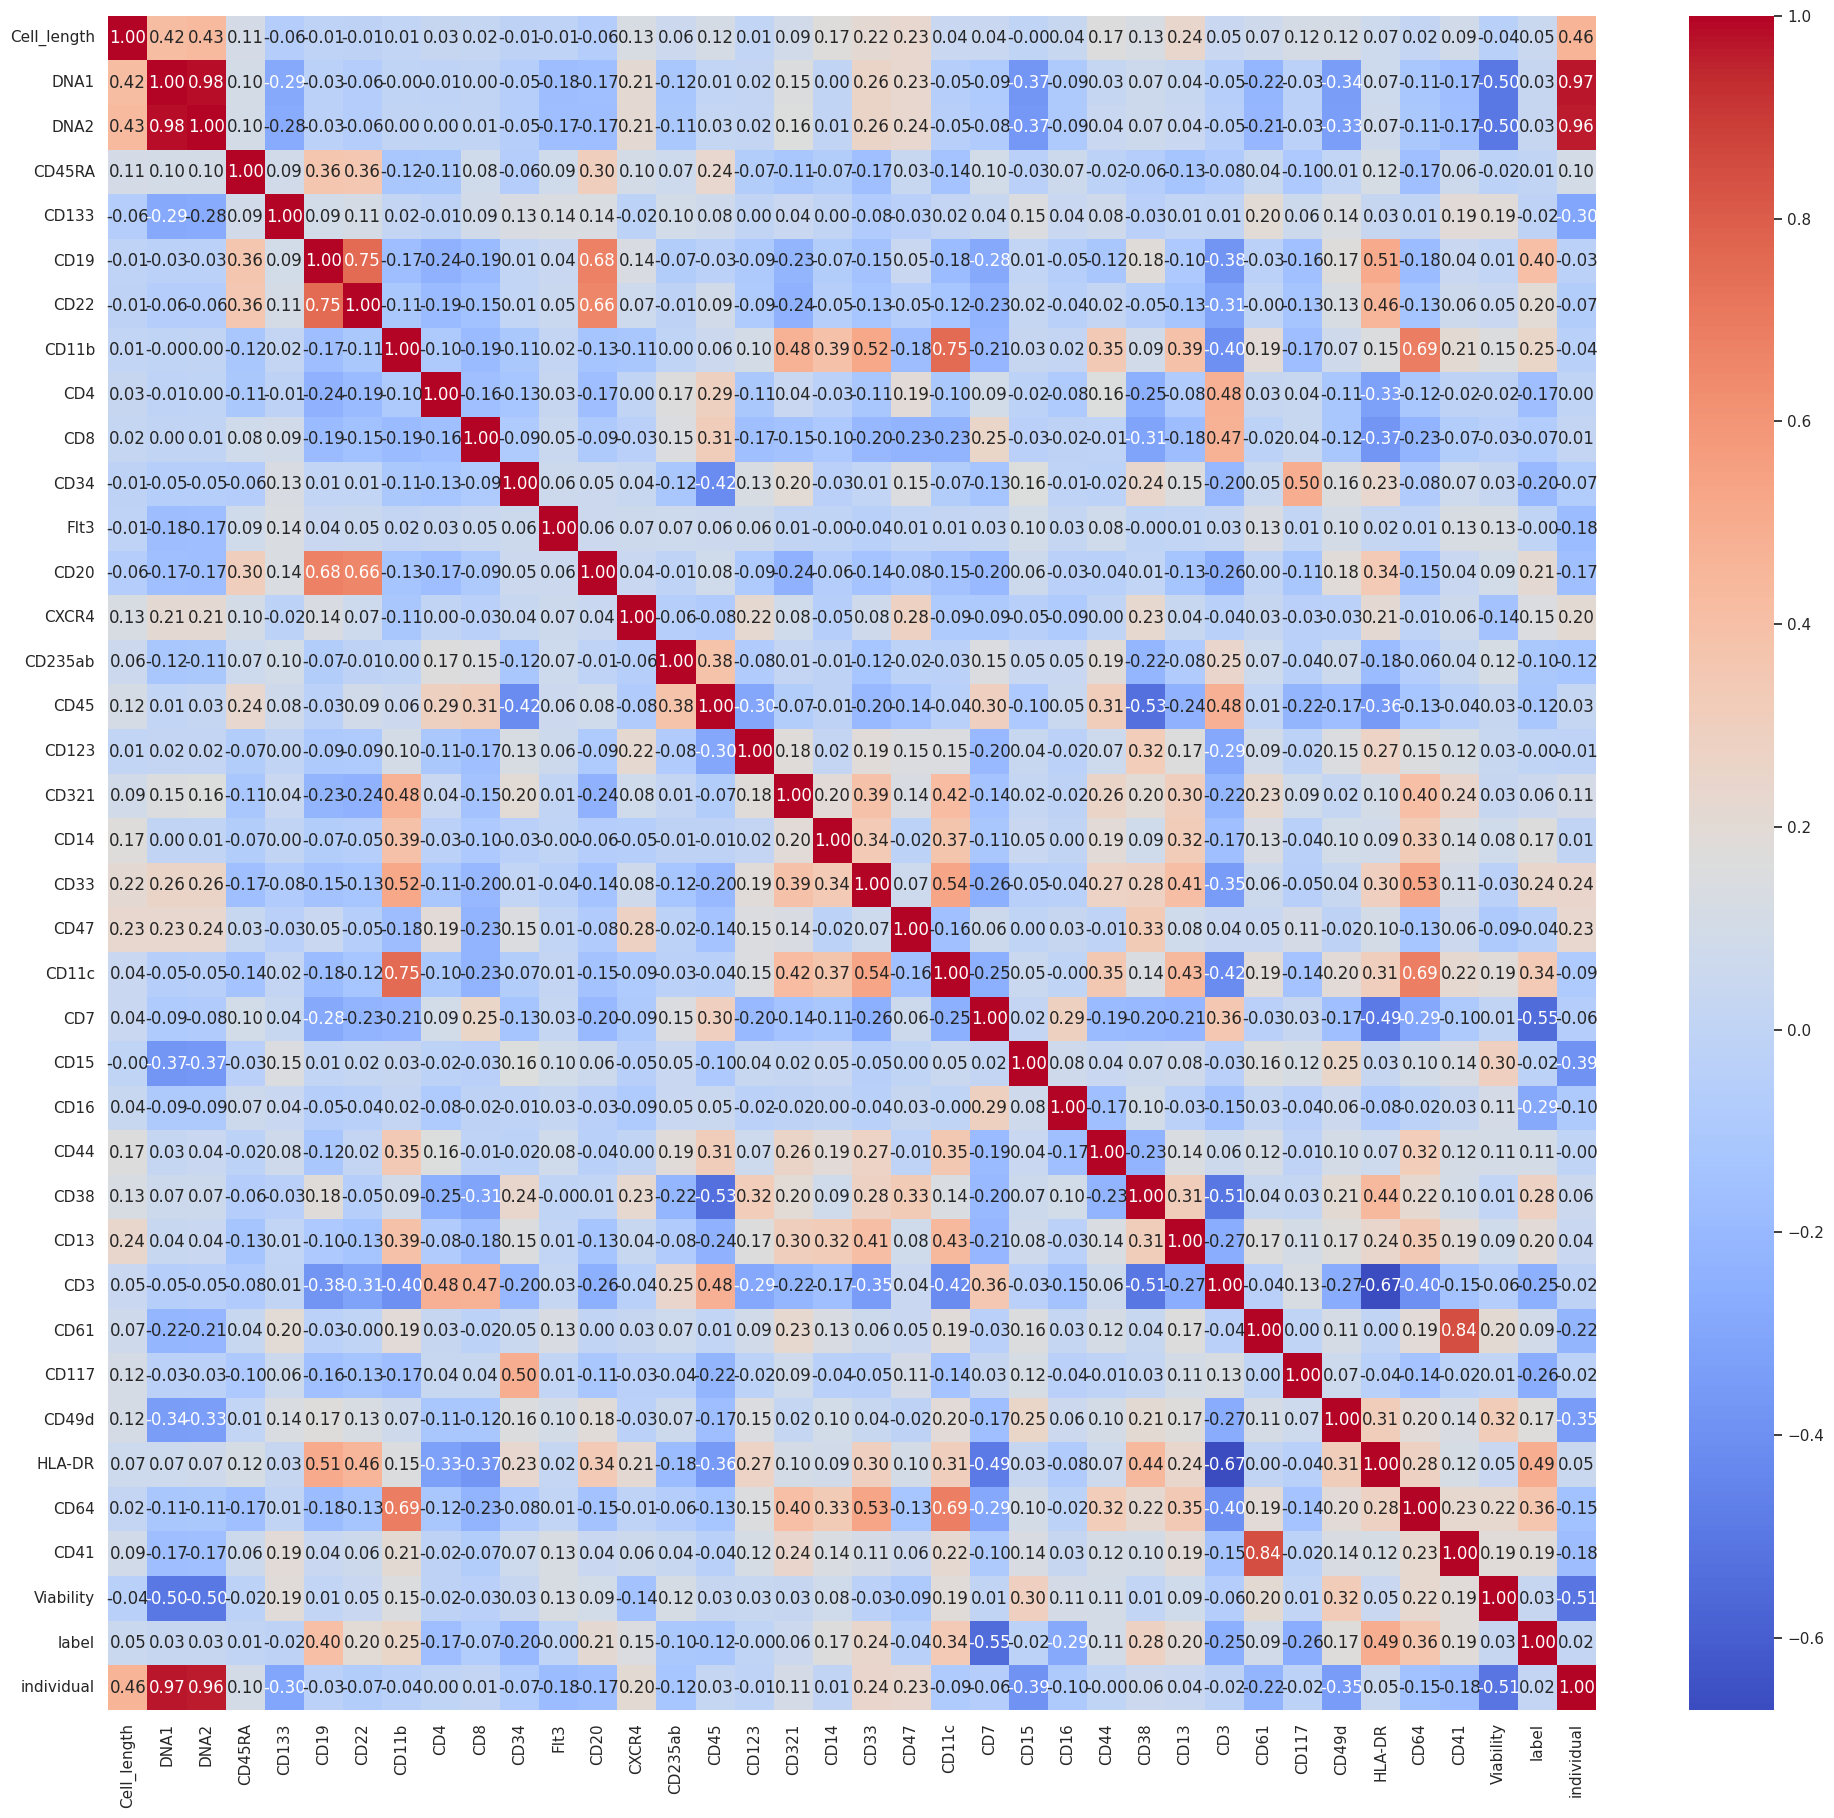

In [ ]:
# Cell 7: Correlation matrix for numerical columns
print("\nCorrelation Matrix:")
correlation_matrix = df.corr()
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(24, 22))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
#plt.title('Correlation Heatmap')
#plt.show()
#sns.pairplot(df[['Time', 'Cell_length', 'DNA1','DNA2','CD45RA', ]])#CD133 CD19 CD22 CD11b  CD4  CD8  CD34  Flt3 CD20    CXCR4   CD235ab   CD45   CD123    CD321   CD14   CD33   CD47 CD11c
                                # CD7  CD15     CD16  CD44  CD38   CD13',  'CD3',  'CD61', 'CD117' , 'CD49d' , 'HLA-DR',    'CD64',  'CD41',  'Viability' ,   'file_number' , 'event_number' , 'label'


             Skewness                   Category
Cell_length  0.527832               Right-skewed
DNA1         0.845010               Right-skewed
DNA2         0.779167               Right-skewed
CD45RA       1.191595               Right-skewed
CD133        2.141953               Right-skewed
CD19         1.682609               Right-skewed
CD22         2.283181               Right-skewed
CD11b        1.679089               Right-skewed
CD4          1.622044               Right-skewed
CD8          1.775713               Right-skewed
CD34         3.492437               Right-skewed
Flt3         7.098151               Right-skewed
CD20         2.754699               Right-skewed
CXCR4        0.955342               Right-skewed
CD235ab      2.001479               Right-skewed
CD45        -1.484824                Left-skewed
CD123        3.648890               Right-skewed
CD321        0.247097  Approximately symmetrical
CD14         3.609006               Right-skewed
CD33         2.72497

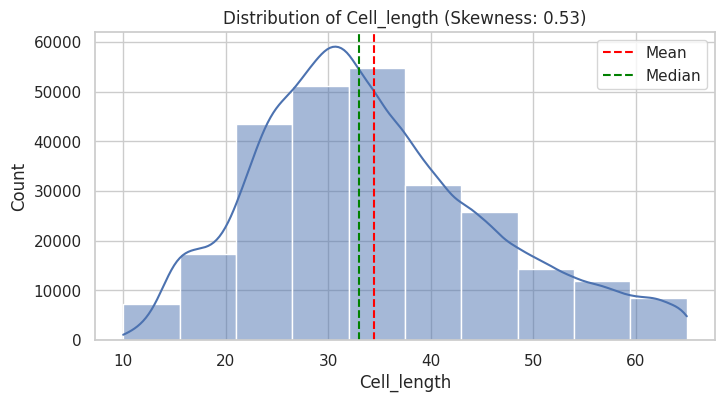

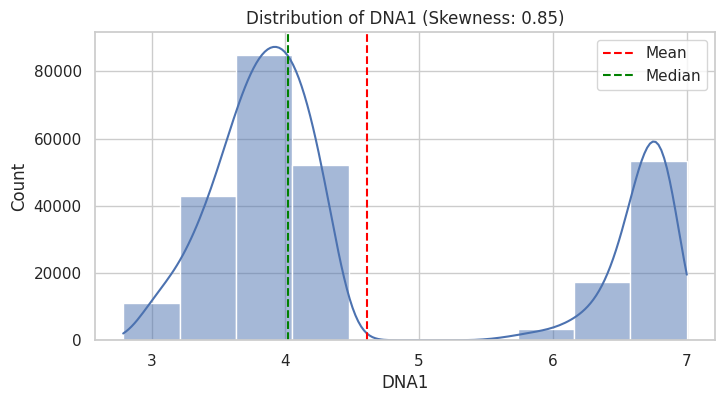

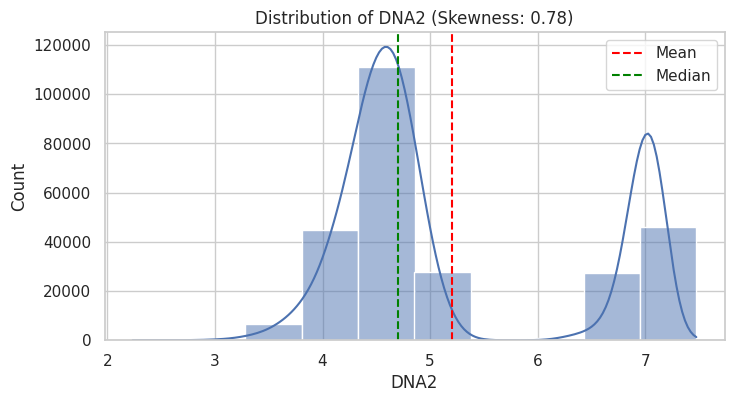

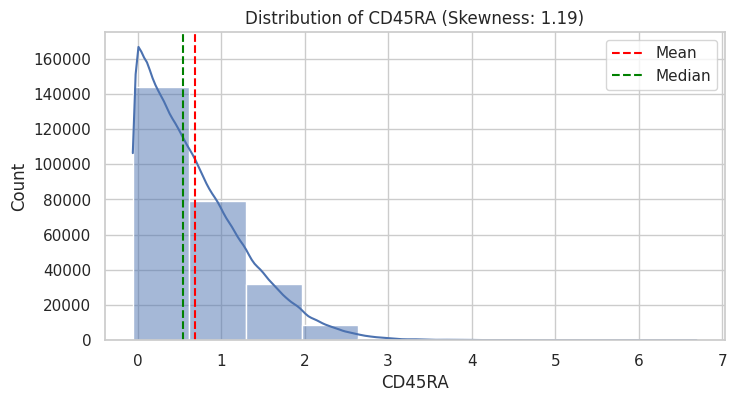

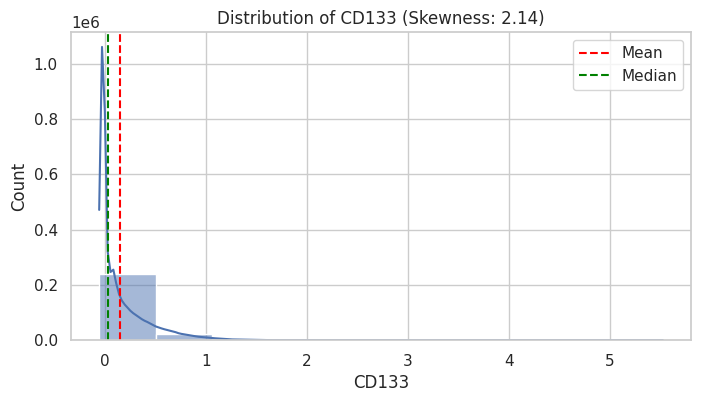

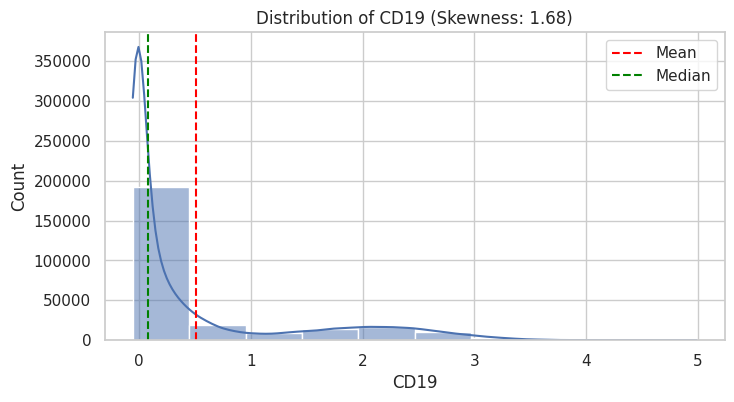

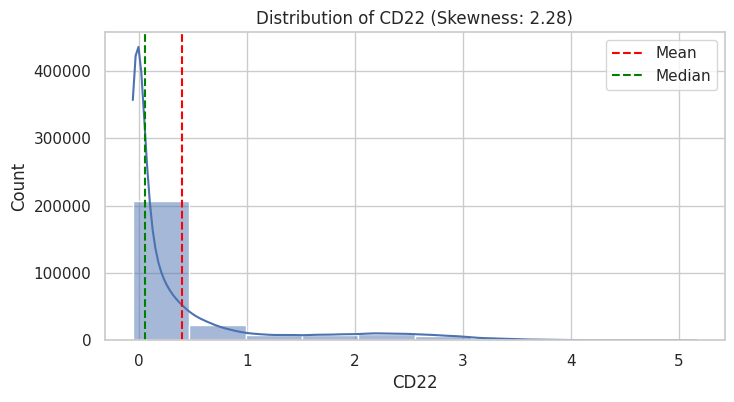

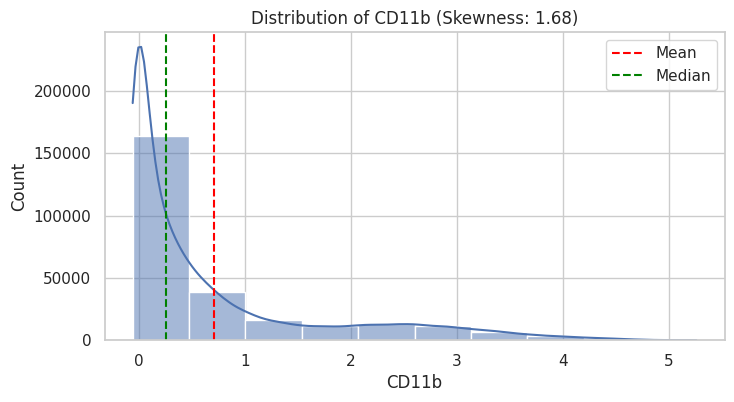

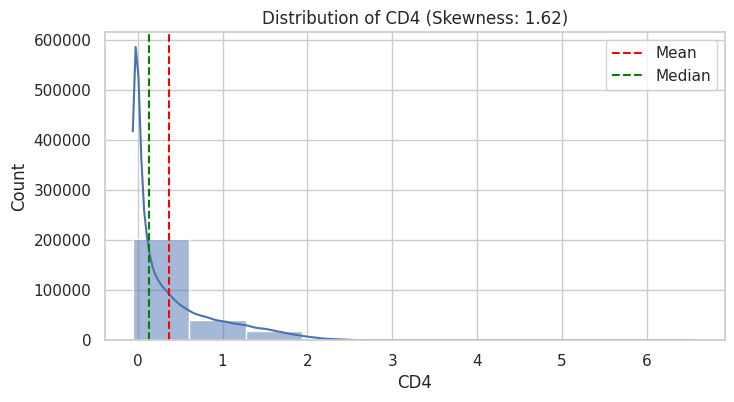

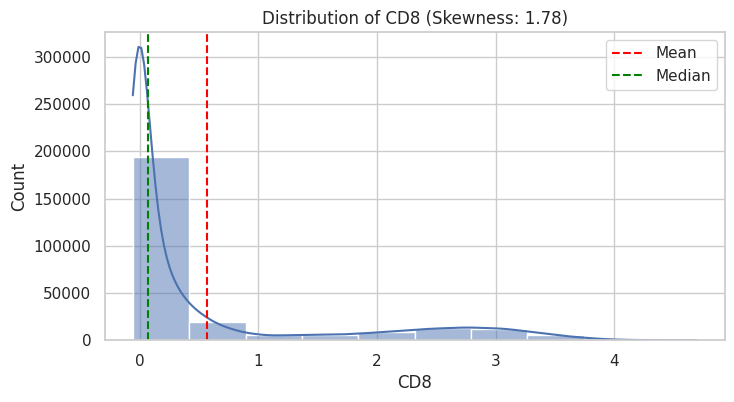

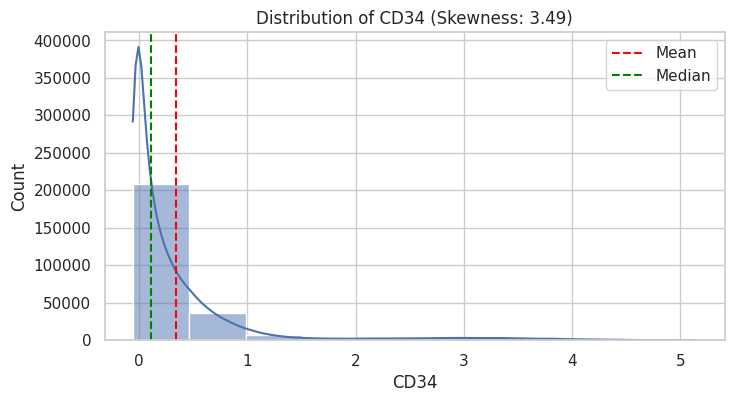

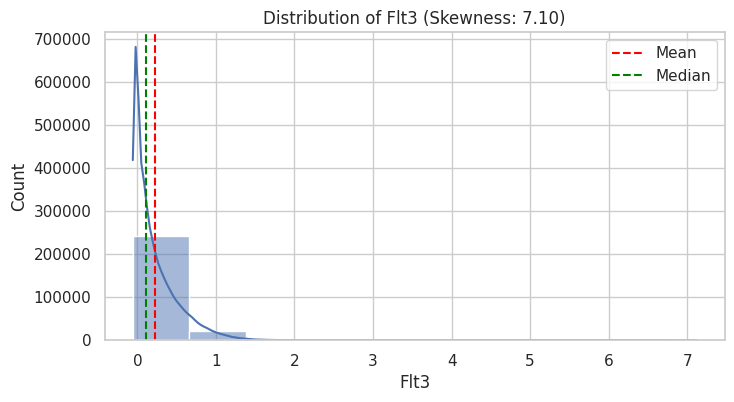

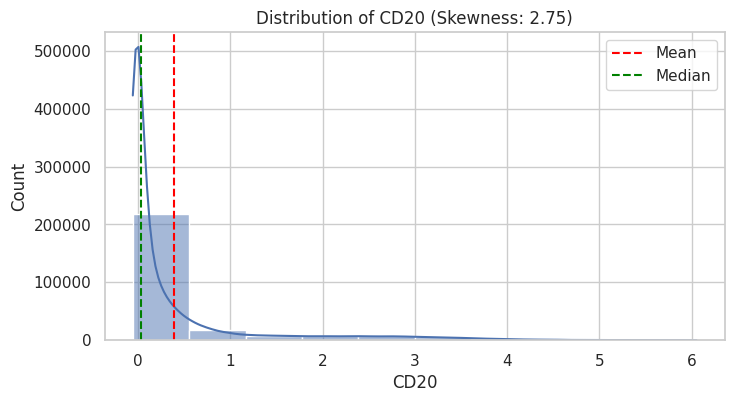

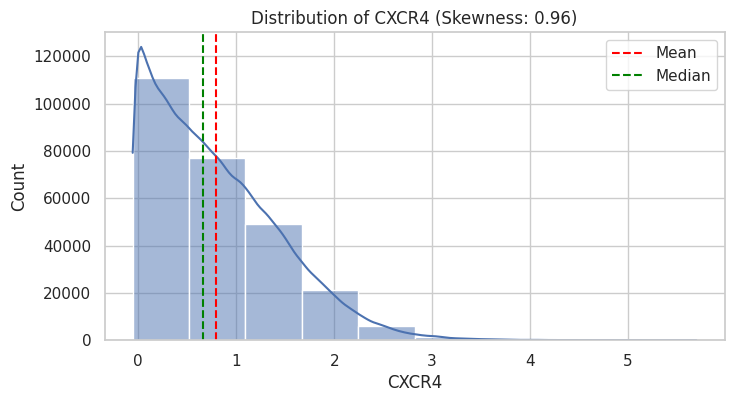

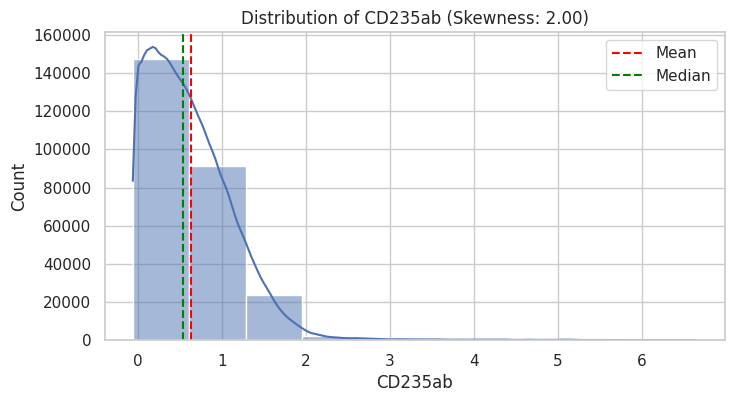

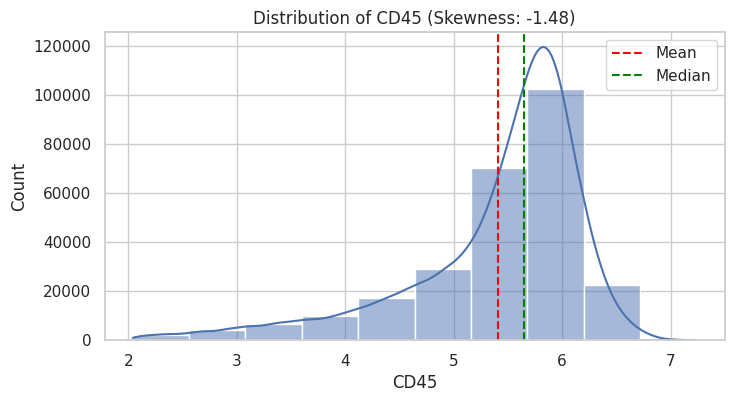

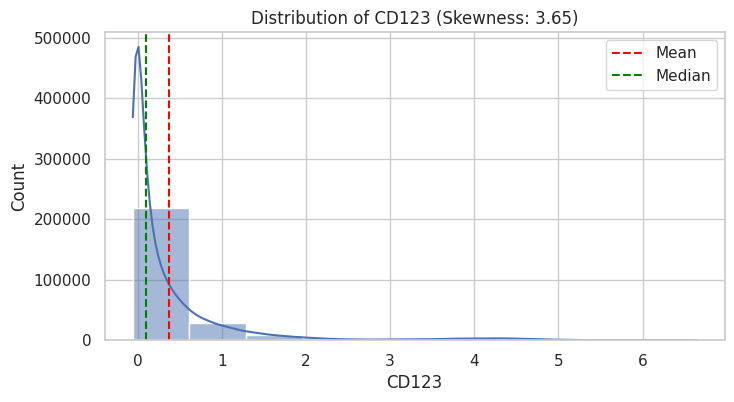

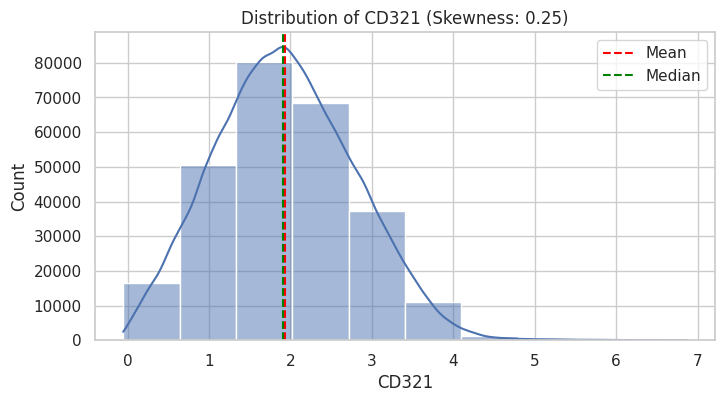

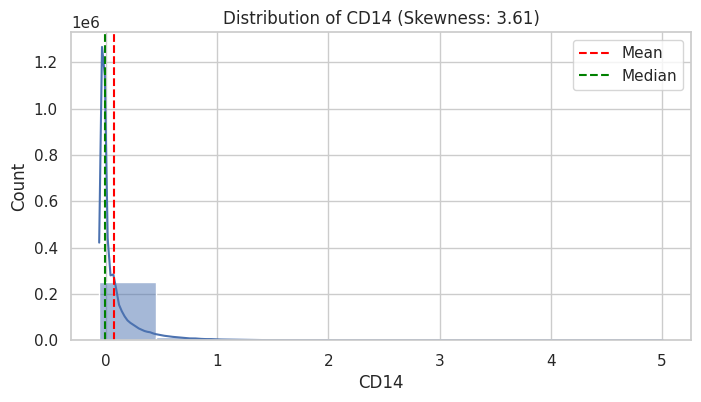

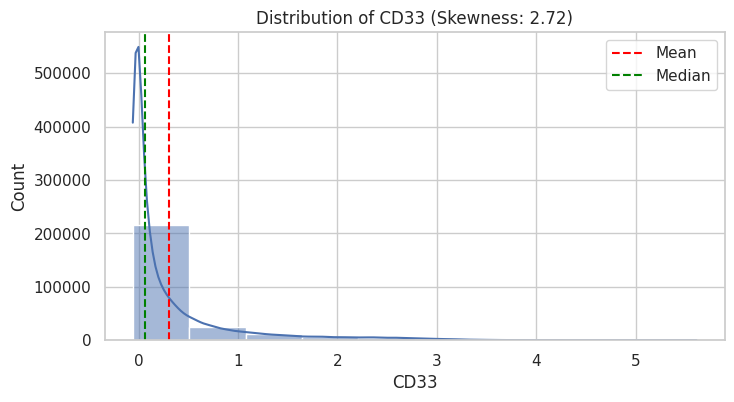

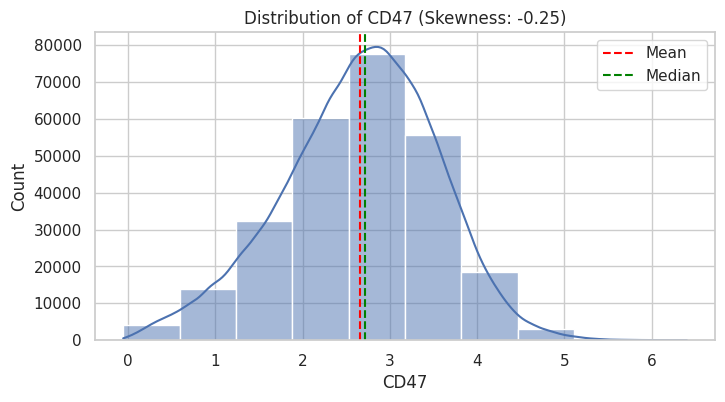

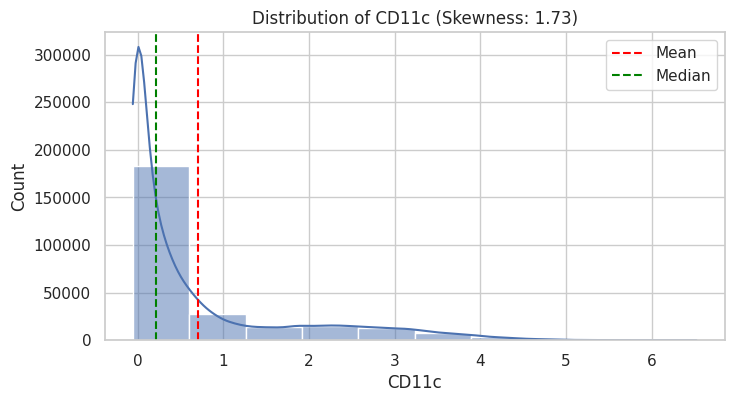

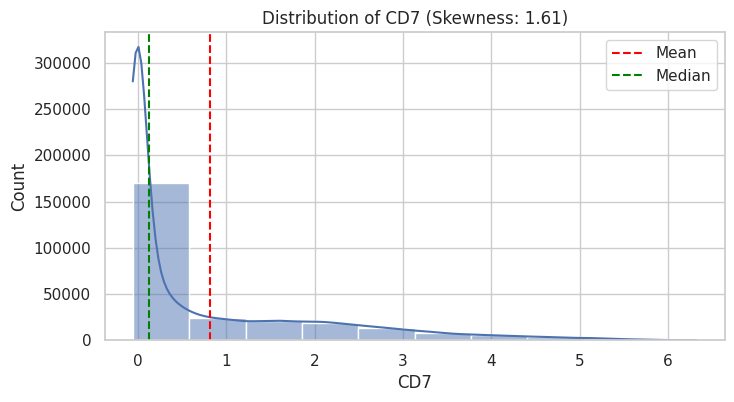

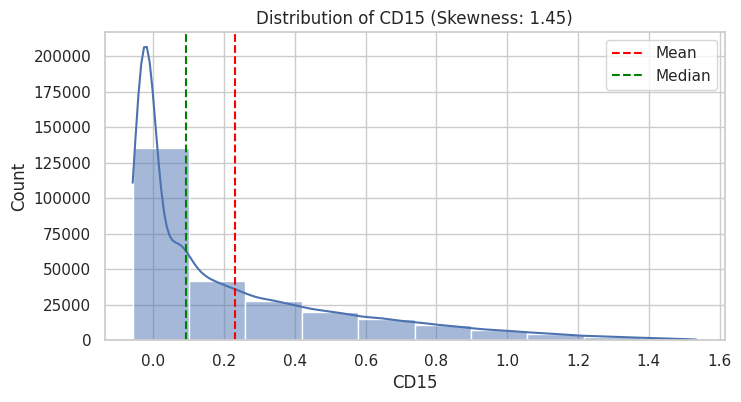

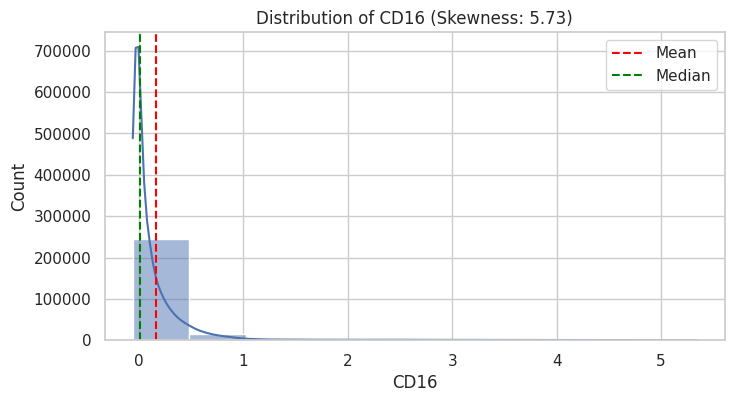

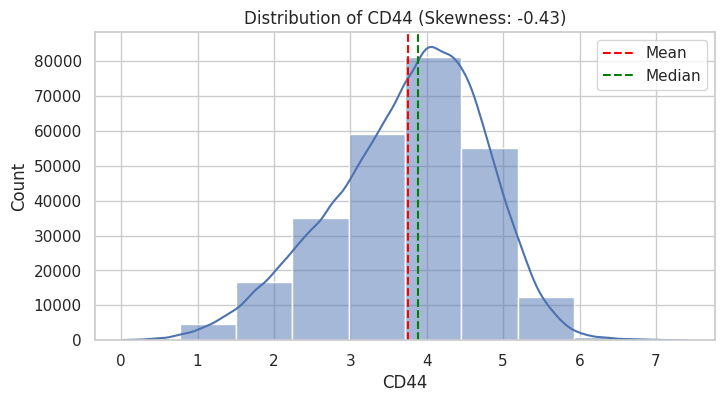

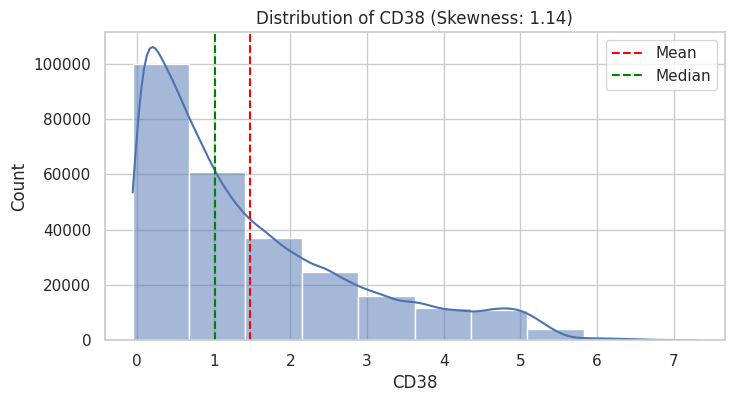

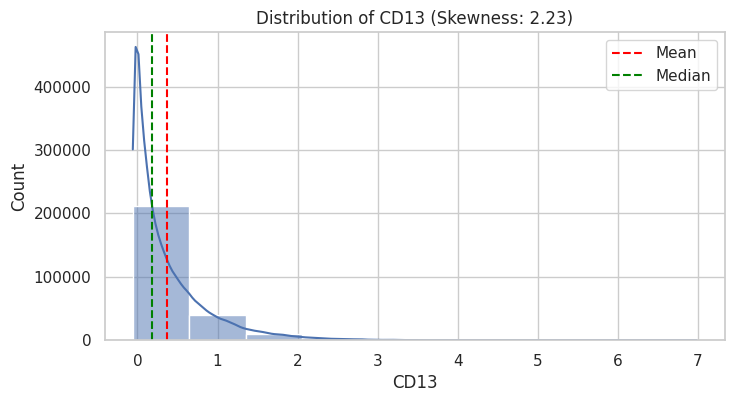

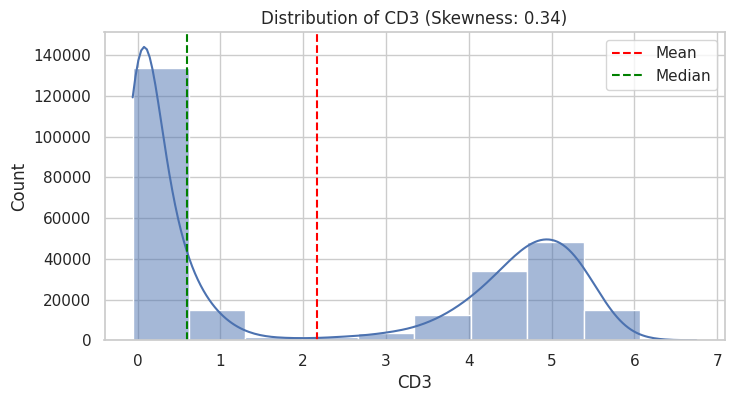

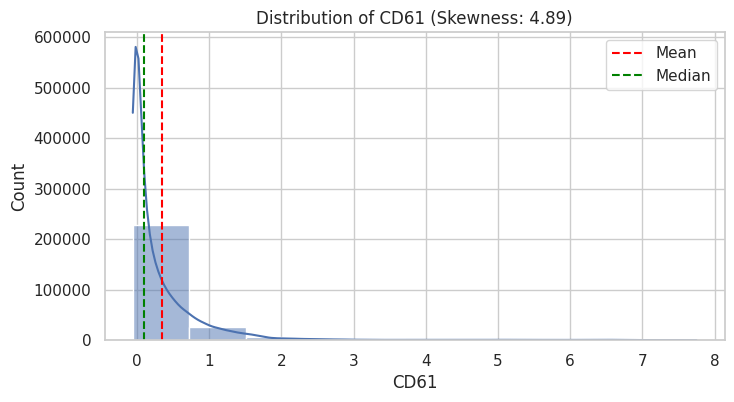

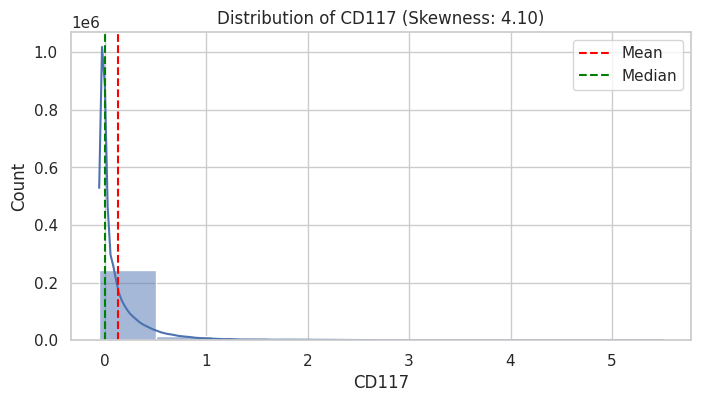

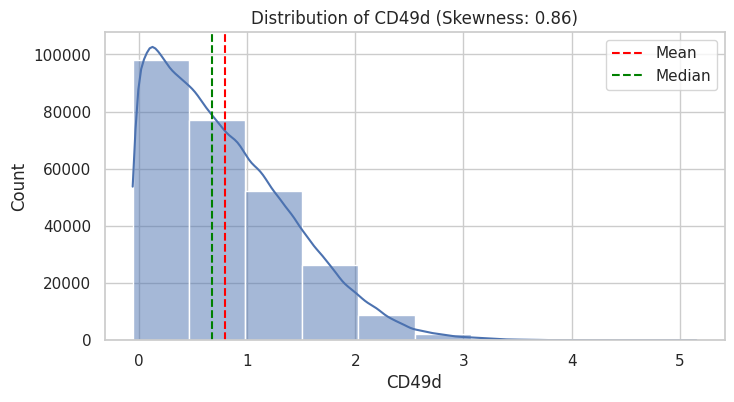

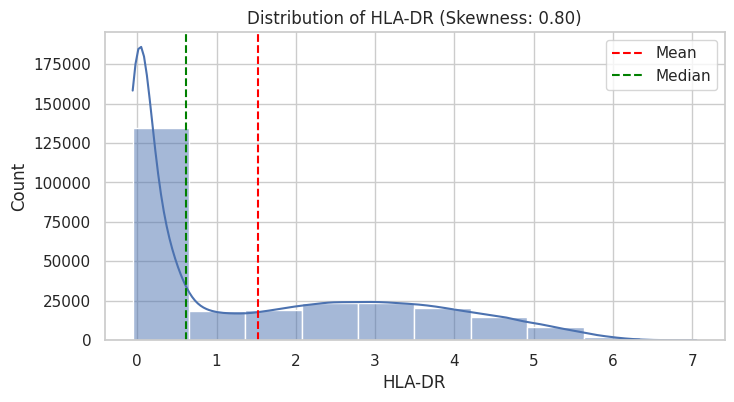

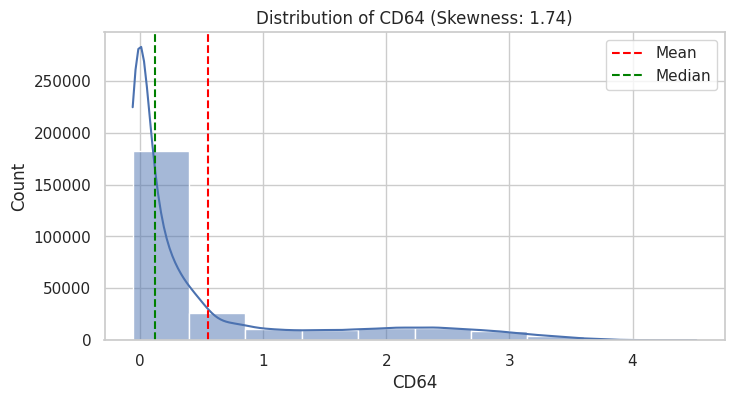

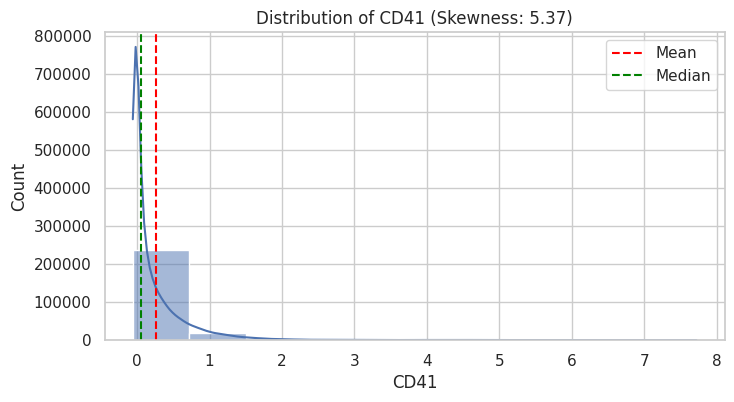

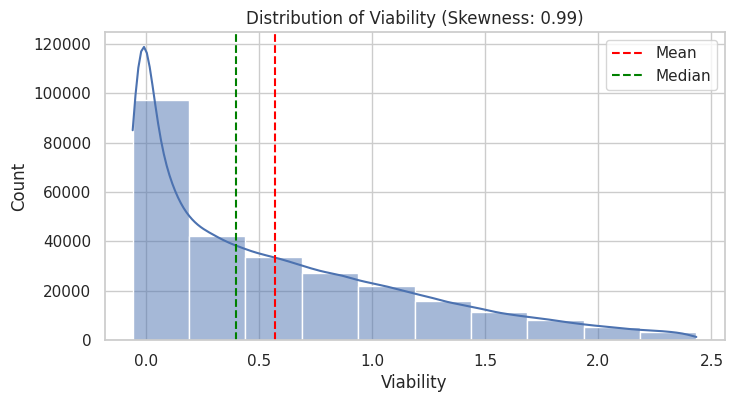

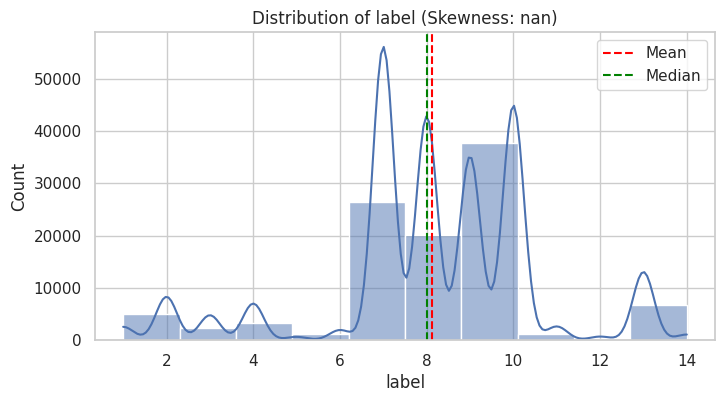

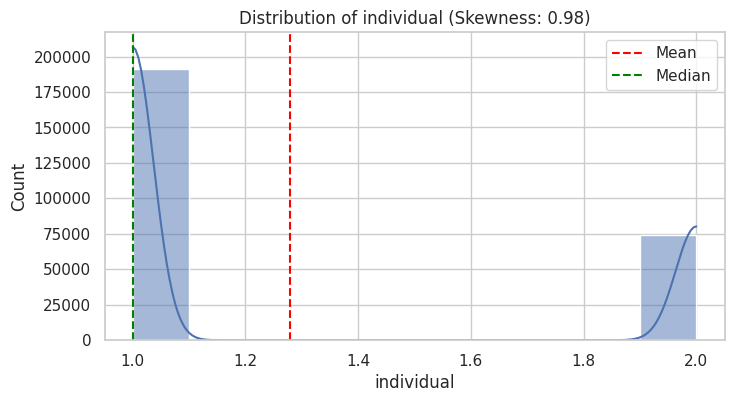

In [ ]:
from scipy.stats import skew

skewness = df.apply(skew)

# Function to categorize skewness
def categorize_skewness(value):
    if value > 0.5:
        return 'Right-skewed'
    elif value < -0.5:
        return 'Left-skewed'
    else:
        return 'Approximately symmetrical'

# Apply the categorization
skewness_category = skewness.apply(categorize_skewness)

# Display skewness and its categorization
skewness_df = pd.DataFrame({'Skewness': skewness, 'Category': skewness_category})
print(skewness_df)
# Plot histograms for each numerical column
for col in df:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=10, kde=True)
    plt.title(f'Distribution of {col} (Skewness: {skewness[col]:.2f})')
    plt.axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(df[col].median(), color='green', linestyle='--', label='Median')
    plt.legend()
    plt.show()

                  Column   Kurtosis                   Category
Cell_length  Cell_length   2.834033  Platykurtic (light tails)
DNA1                DNA1   1.994037  Platykurtic (light tails)
DNA2                DNA2   1.975021  Platykurtic (light tails)
CD45RA            CD45RA   4.964272  Leptokurtic (heavy tails)
CD133              CD133   9.190066  Leptokurtic (heavy tails)
CD19                CD19   4.590887  Leptokurtic (heavy tails)
CD22                CD22   7.500223  Leptokurtic (heavy tails)
CD11b              CD11b   4.964495  Leptokurtic (heavy tails)
CD4                  CD4   5.844261  Leptokurtic (heavy tails)
CD8                  CD8   4.745776  Leptokurtic (heavy tails)
CD34                CD34  16.596416  Leptokurtic (heavy tails)
Flt3                Flt3  85.583534  Leptokurtic (heavy tails)
CD20                CD20  10.435449  Leptokurtic (heavy tails)
CXCR4              CXCR4   3.936307  Leptokurtic (heavy tails)
CD235ab          CD235ab  13.440586  Leptokurtic (heavy

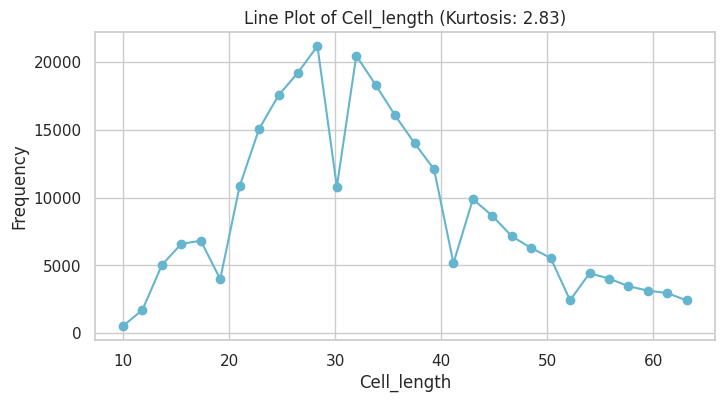

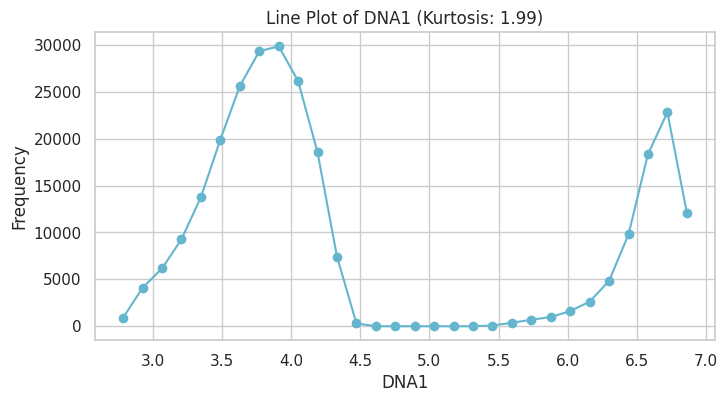

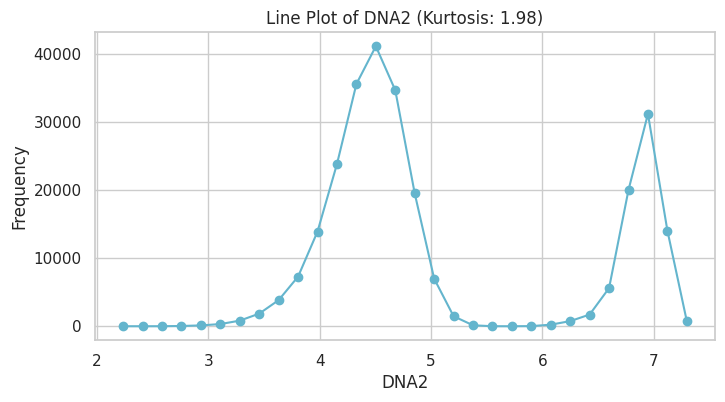

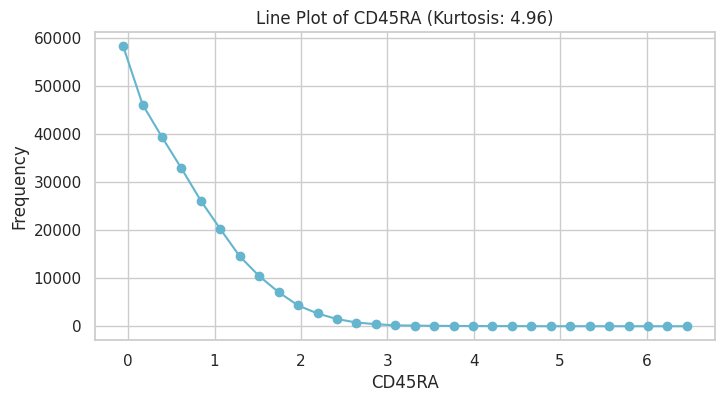

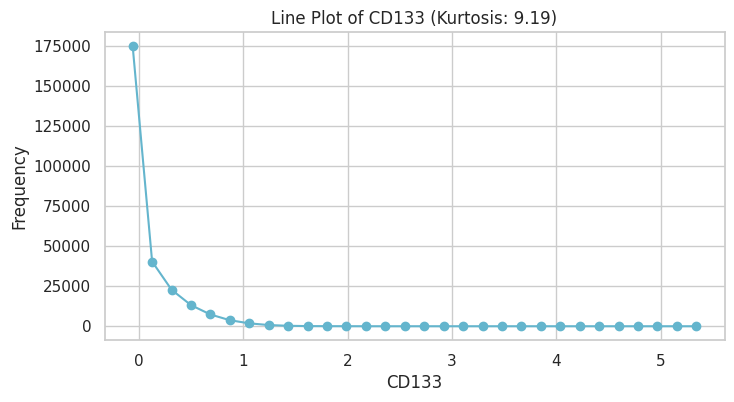

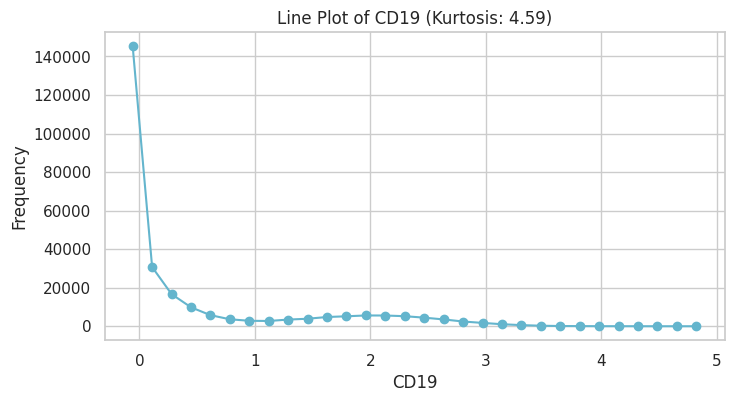

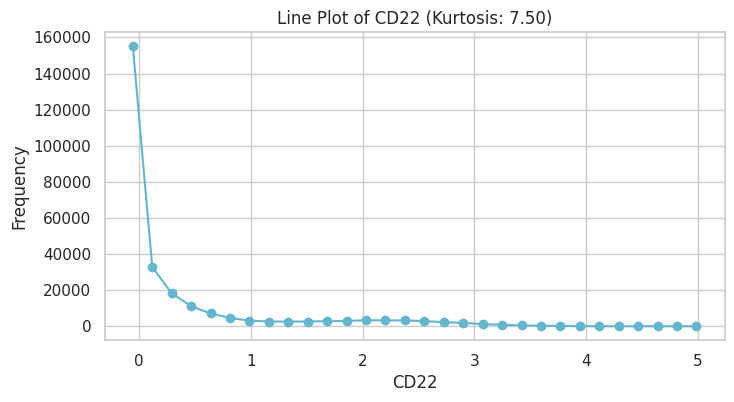

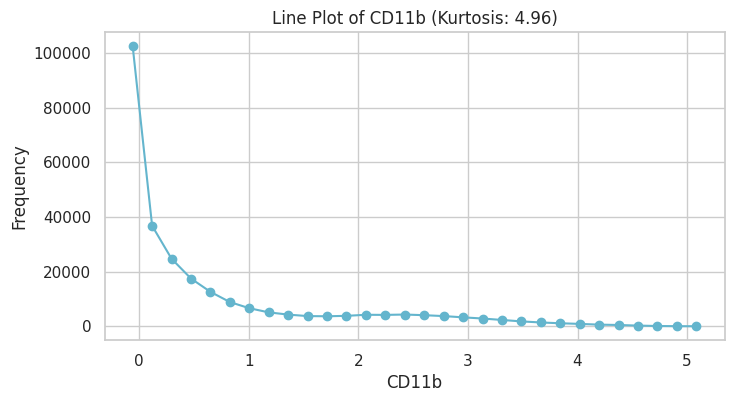

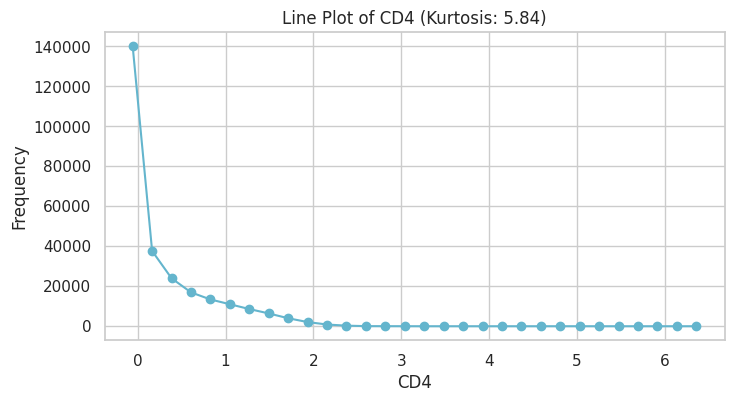

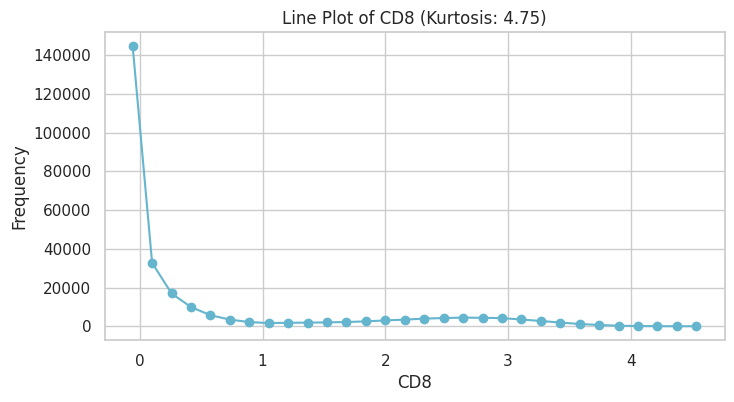

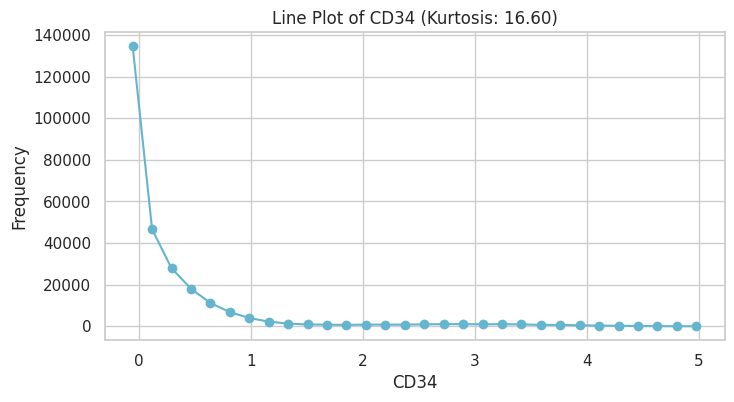

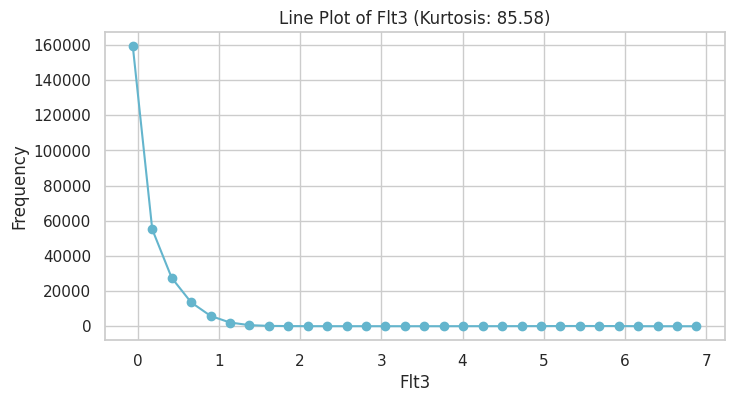

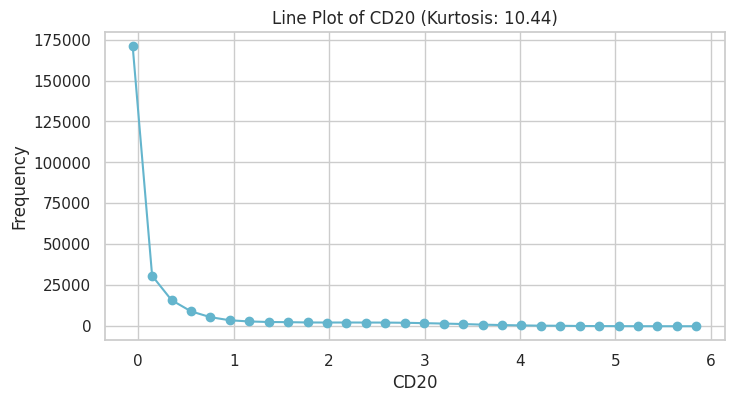

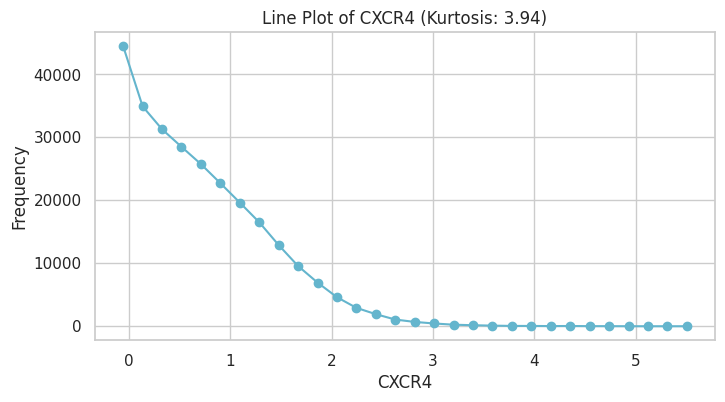

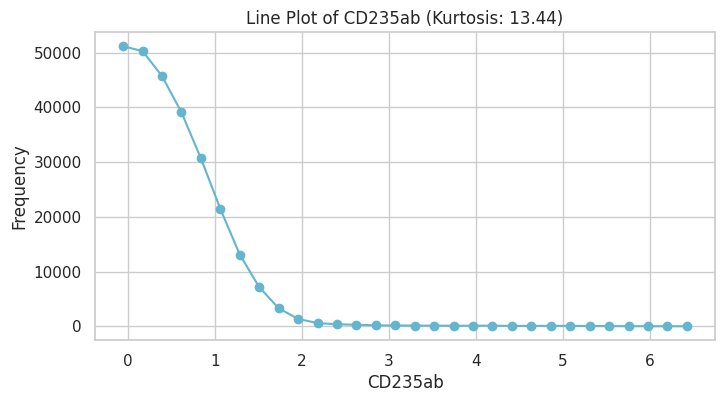

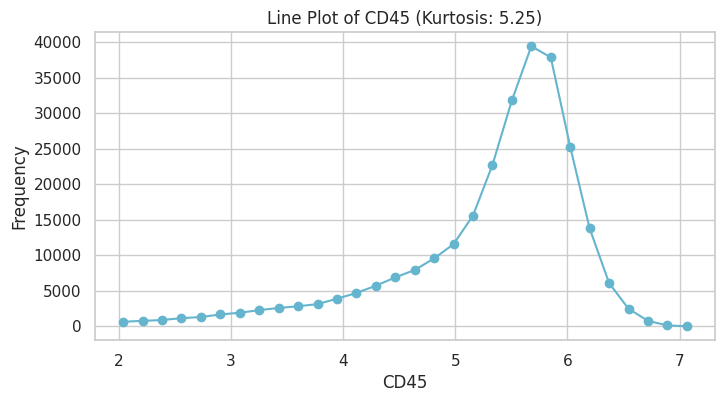

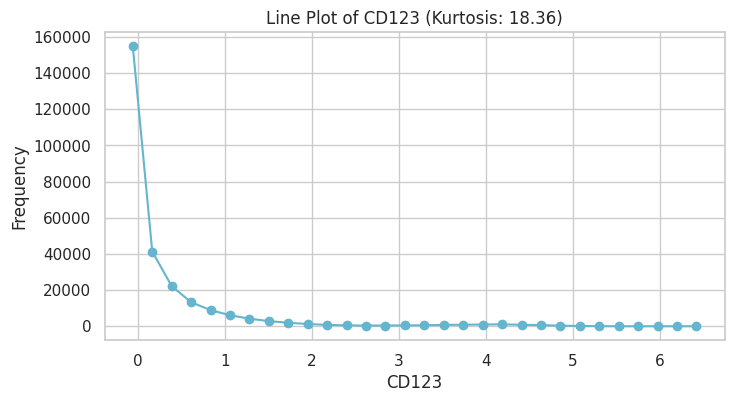

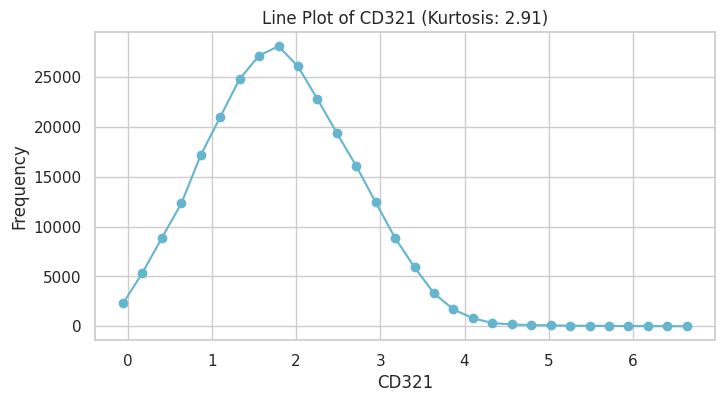

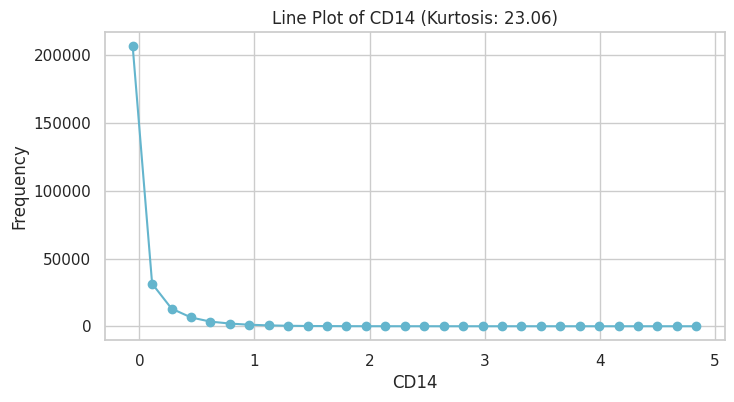

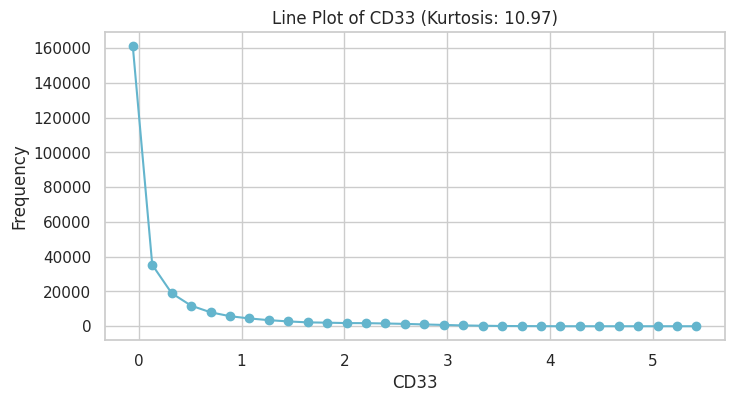

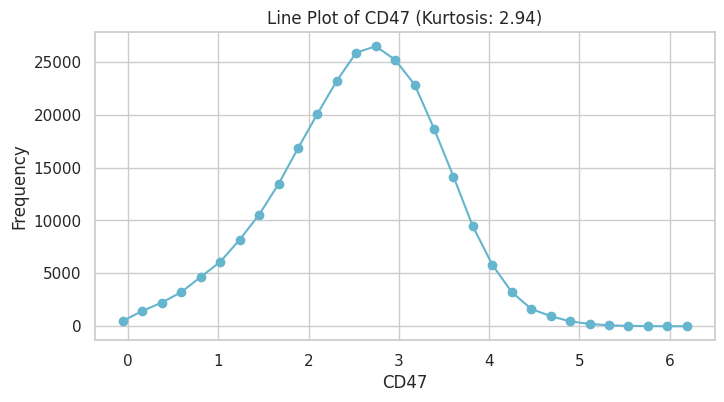

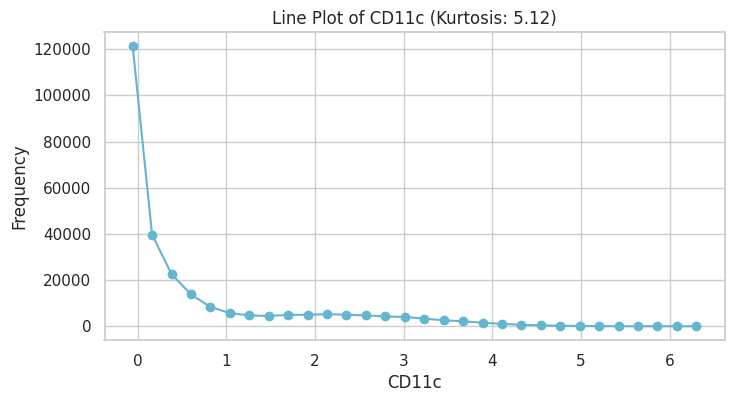

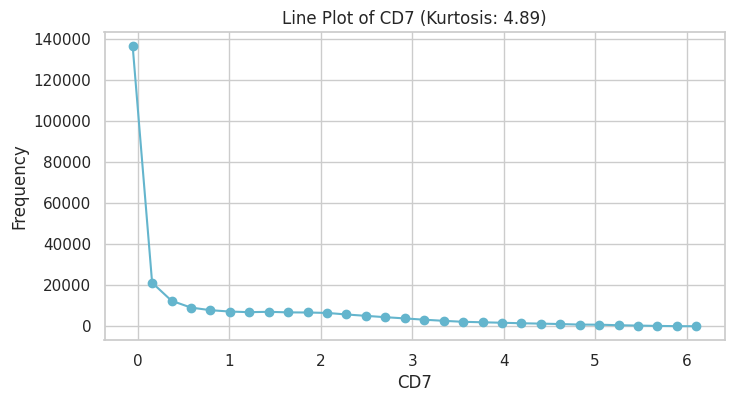

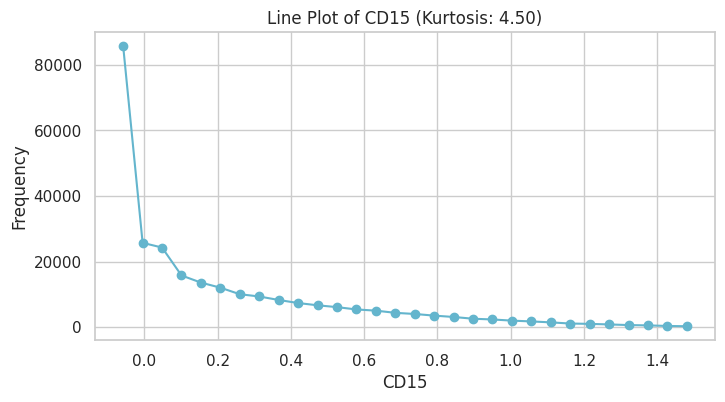

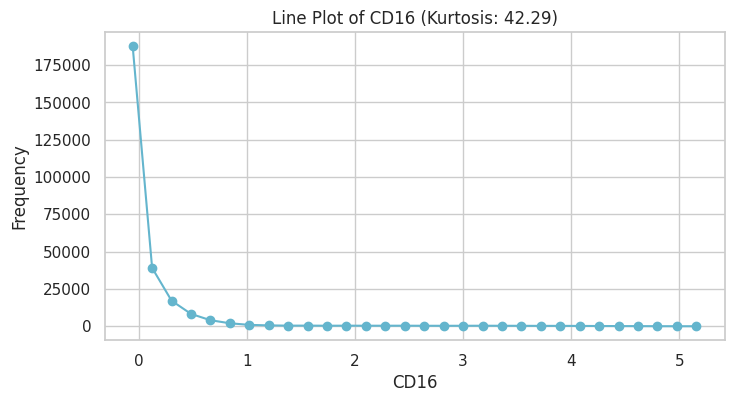

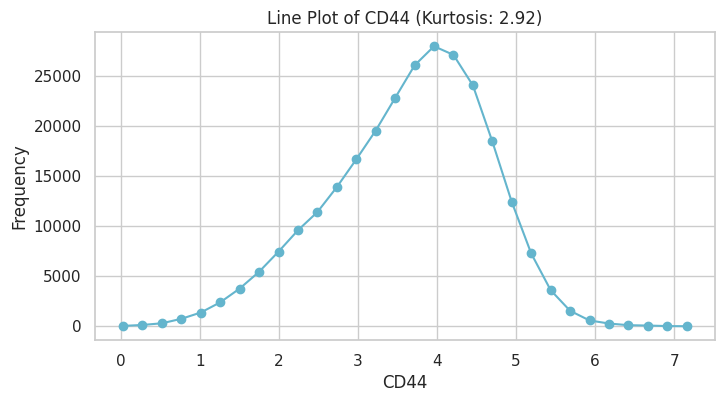

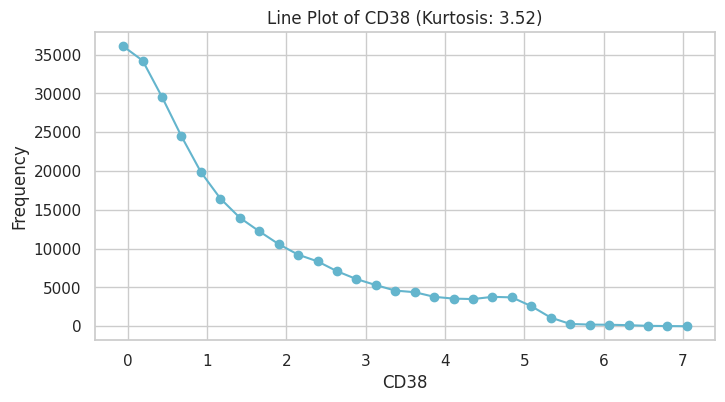

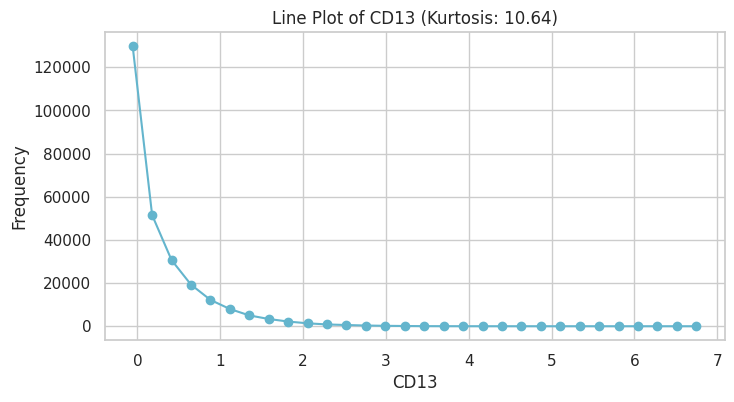

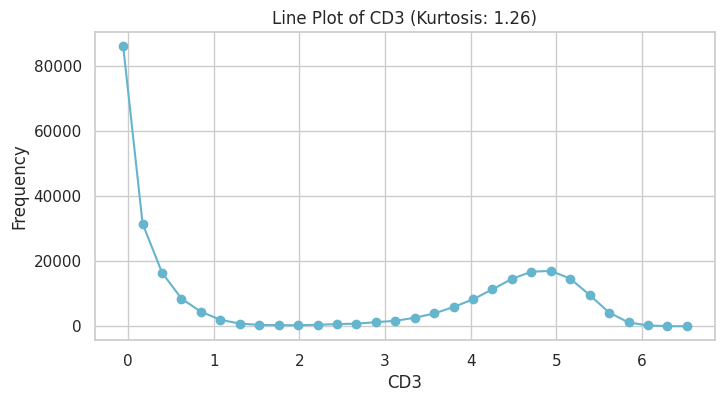

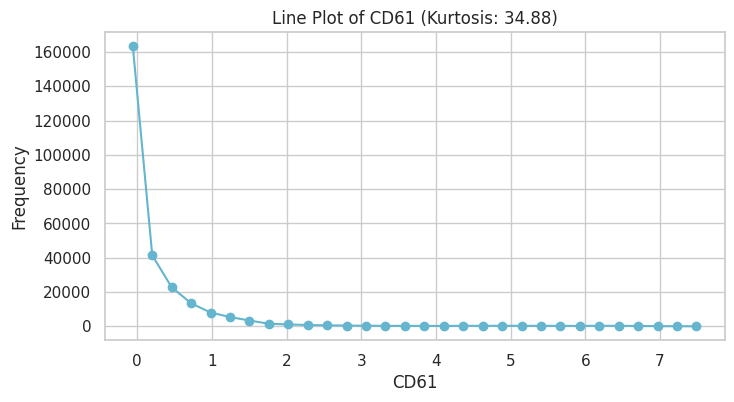

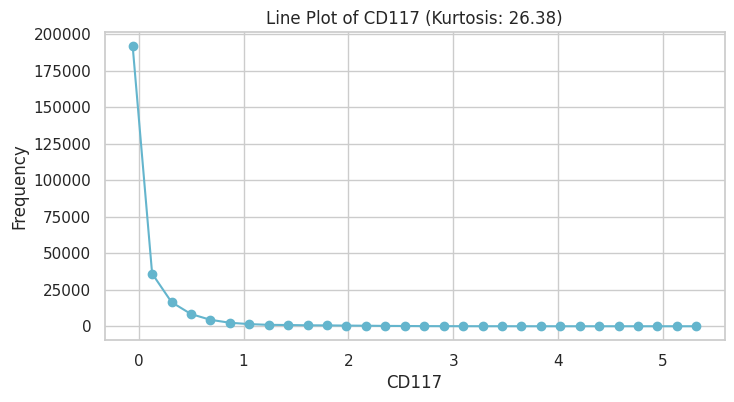

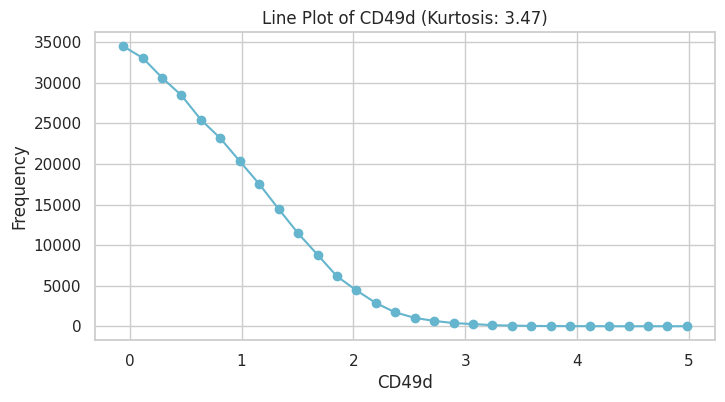

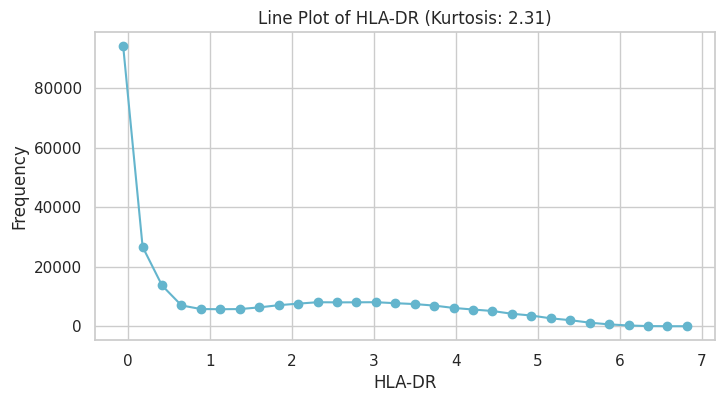

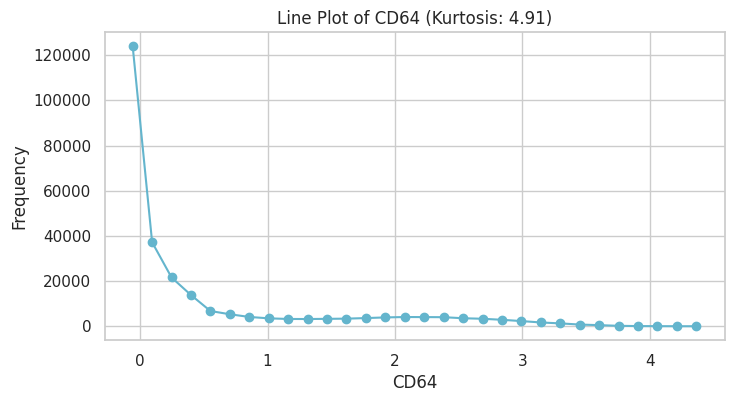

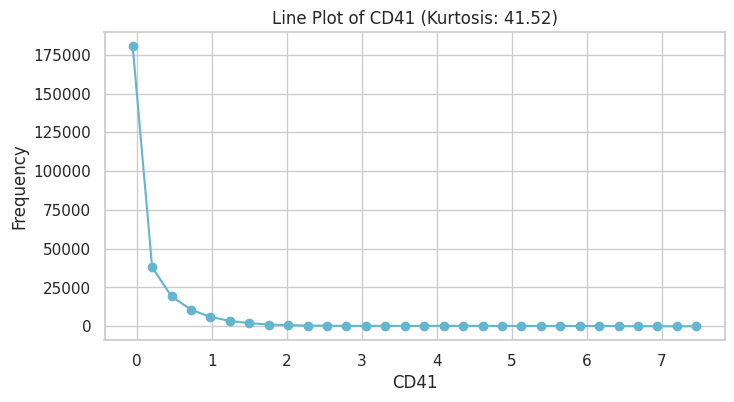

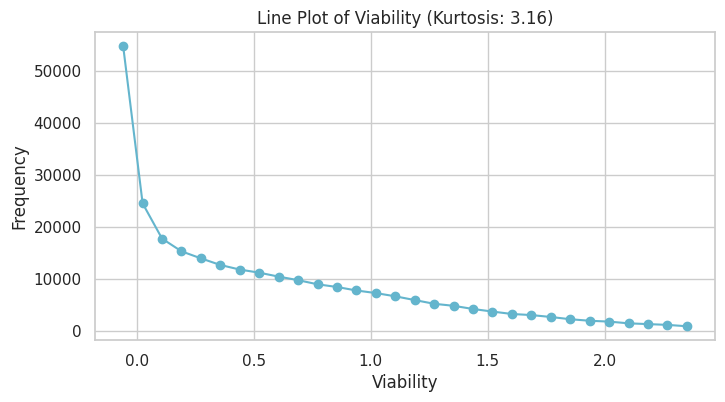

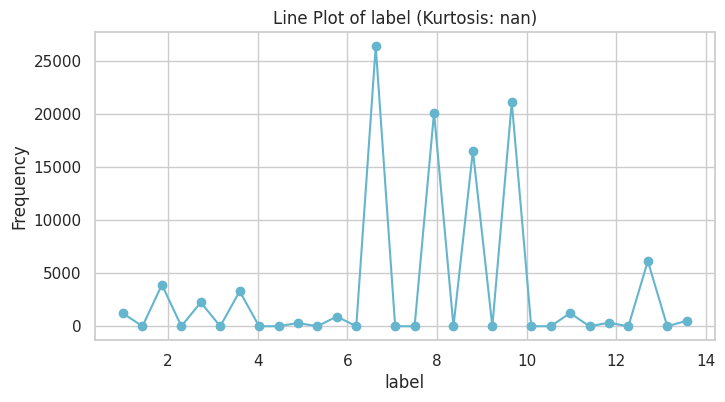

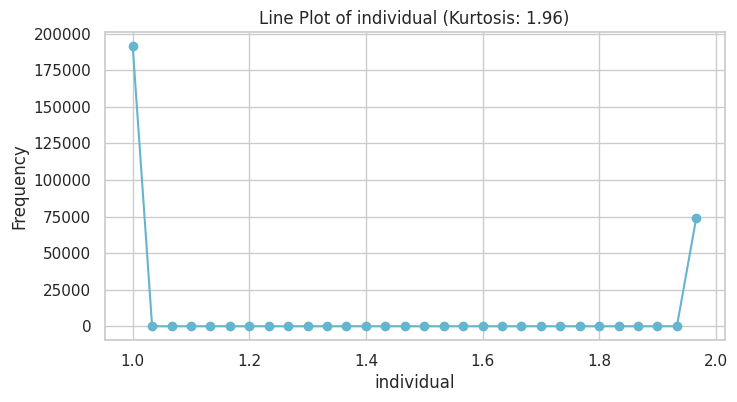

In [ ]:
from scipy.stats import kurtosis
# Calculate kurtosis for each column
kurtosis_values = df.apply(kurtosis, fisher=False)  # Fisher=False gives Pearson kurtosis (normal kurtosis = 3)

# Create a DataFrame with kurtosis values
kurtosis_df = pd.DataFrame({'Column': df.columns, 'Kurtosis': kurtosis_values})

#  Categorize the kurtosis values (Leptokurtic, Mesokurtic, Platykurtic)
def categorize_kurtosis(value):
    if value > 3:
        return 'Leptokurtic (heavy tails)'
    elif value < 3:
        return 'Platykurtic (light tails)'
    else:
        return 'Mesokurtic (normal tails)'

kurtosis_df['Category'] = kurtosis_df['Kurtosis'].apply(categorize_kurtosis)

# Print the kurtosis values and their categories
print(kurtosis_df)# 4.1 Histogram for each column
'''
for column in df.columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df[column].dropna(), bins=30, color='c', edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column} (Kurtosis: {kurtosis_df.loc[kurtosis_df["Column"] == column, "Kurtosis"].values[0]:.2f})')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()'''

# 4.1 Line graph for each column (without KDE)
for column in df.columns:
    plt.figure(figsize=(8, 4))

    # Calculate histogram values (frequency and bin edges)
    counts, bin_edges = np.histogram(df[column].dropna(), bins=30)

    # Plot as a line graph
    plt.plot(bin_edges[:-1], counts, color='c', marker='o', linestyle='-', label=f'{column} Distribution')

    plt.title(f'Line Plot of {column} (Kurtosis: {kurtosis_df.loc[kurtosis_df["Column"] == column, "Kurtosis"].values[0]:.2f})')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


To Standardize the data for PCA and t-sne

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Example data (replace this with your mass cytometry dataset)
# Assuming 'features' is a DataFrame containing your mass cytometry features
features = pd.DataFrame(data)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(features)

# Convert back to a DataFrame if needed for further use
scaled_features = pd.DataFrame(scaled_data, columns=features.columns)

# Now you can use 'scaled_features' for t-SNE or other analyses


PCA for Dimensionality Reduction and plotting 2D plot


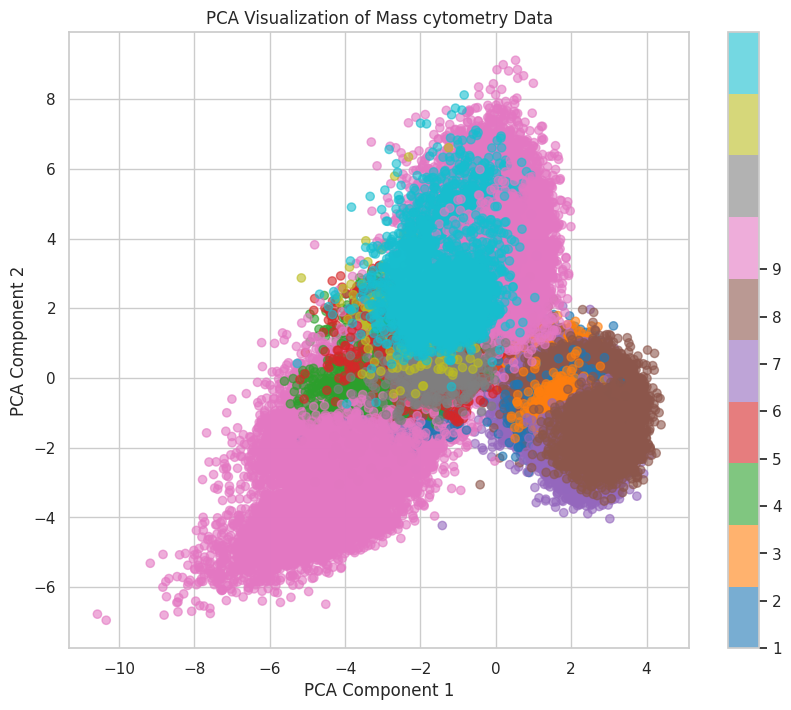

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Columns to exclude from the analysis
exclude_columns = ['Event', 'Time', 'file_number', 'event_number', 'label', 'individual']

# Dropping the columns to exclude
data_filtered = data.drop(exclude_columns, axis=1)

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_filtered)

# Apply PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_data)

# Adding PCA results to the original dataframe
data['PCA1'] = pca_results[:, 0]
data['PCA2'] = pca_results[:, 1]

# Plotting the PCA results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data['PCA1'], data['PCA2'], c=data['label'], cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=range(10))
plt.title('PCA Visualization of Mass cytometry Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


PCA for Dimensionality Reduction and plotting 3D plot

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Columns to exclude from the analysis
exclude_columns = ['Event', 'Time', 'file_number', 'event_number', 'label', 'individual']

# Dropping the columns to exclude
data_filtered = data.drop(exclude_columns, axis=1)

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_filtered)

# Apply PCA with 4 components
pca = PCA(n_components=4)
pca_results = pca.fit_transform(scaled_data)

# Adding PCA results to the original dataframe
data['PCA1'] = pca_results[:, 0]
data['PCA2'] = pca_results[:, 1]
data['PCA3'] = pca_results[:, 2]
data['PCA4'] = pca_results[:, 3]

# Print the PCA results (Standard deviation, Proportion of variance, and Cumulative Proportion)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
standard_deviation = pca.singular_values_ / np.sqrt(len(data_filtered) - 1)

print(f"Standard deviation: {standard_deviation}")
print(f"Proportion of Variance: {explained_variance}")
print(f"Cumulative Proportion: {cumulative_variance}")

# Plotting the PCA results in 3D (PC1, PC2, PC3)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
scatter = ax.scatter(data['PCA1'], data['PCA2'], data['PCA3'], c=data['label'], cmap='tab10', alpha=0.6)

# Add labels and title
ax.set_title('PCA Visualization of Mass Cytometry Data (3D: PC1, PC2, PC3)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Adding color bar
plt.colorbar(scatter, ticks=range(10))

plt.show()


Standard deviation: [2.33033605 1.96234686 1.89526477 1.61107568]
Proportion of Variance: [0.15084571 0.10696641 0.09977819 0.07209875]
Cumulative Proportion: [0.15084571 0.25781212 0.35759032 0.42968907]


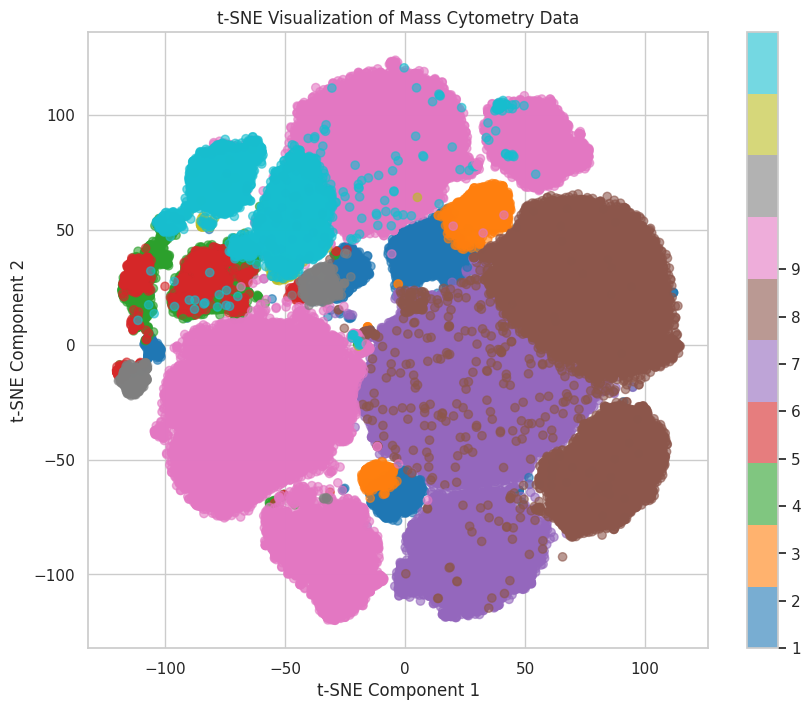

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_data)

# Adding t-SNE results to the original dataframe
data['TSNE1'] = tsne_results[:, 0]
data['TSNE2'] = tsne_results[:, 1]

# Plotting the t-SNE results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data['TSNE1'], data['TSNE2'], c=data['label'], cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=range(10))
plt.title('t-SNE Visualization of Mass Cytometry Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


Performing Binary mask on dummy dataset

In [ ]:
import numpy as np
import pandas as pd

# Example DataFrame (replace with your actual dataset)
data = pd.DataFrame({
    'Column 1': np.random.randint(1, 100, 10),
    'Column 2': np.random.rand(10),
    'Column 3': np.random.rand(10),
    'Column 4': np.random.choice([0, 1], 10)  # Binary label column
})

# Convert DataFrame to a NumPy array for easier manipulation
data_np = data.values

# Set the masking probability
p_m = 0.5  # probability of keeping a value (set to 1)

# Generate binary mask with np.random.binomial
# This creates a mask with 1s and 0s, where 1 appears with probability p_m
mask = np.random.binomial(1, p_m, data_np.shape)

# Apply the binary mask to the data
masked_data = data_np * mask

# Convert back to DataFrame if needed
masked_data_df = pd.DataFrame(masked_data, columns=data.columns)

print("Original Data:\n", data)
print("\nBinary Mask:\n", mask)
print("\nMasked Data:\n", masked_data_df)


Original Data:
    Column 1  Column 2  Column 3  Column 4
0        16  0.350089  0.074442         1
1        91  0.818622  0.127987         0
2        96  0.338099  0.412893         0
3        70  0.143231  0.214960         1
4        96  0.689741  0.092230         0
5        79  0.430490  0.830206         1
6        64  0.297209  0.743833         1
7        51  0.528683  0.830318         0
8        71  0.226722  0.031877         1
9        12  0.117416  0.321475         1

Binary Mask:
 [[0 0 1 1]
 [0 1 0 1]
 [1 0 1 1]
 [0 1 1 0]
 [1 0 0 0]
 [0 1 1 1]
 [0 0 1 0]
 [1 0 0 1]
 [1 1 1 1]
 [1 0 0 1]]

Masked Data:
    Column 1  Column 2  Column 3  Column 4
0       0.0  0.000000  0.074442       1.0
1       0.0  0.818622  0.000000       0.0
2      96.0  0.000000  0.412893       0.0
3       0.0  0.143231  0.214960       0.0
4      96.0  0.000000  0.000000       0.0
5       0.0  0.430490  0.830206       1.0
6       0.0  0.000000  0.743833       0.0
7      51.0  0.000000  0.000000       0.0
8  

In [ ]:
import pandas as pd
import os

columns_to_drop = ['Event', 'Time', 'file_number','event_number']
data = data.drop(columns=columns_to_drop, errors='ignore')
df_labeled = data[data['label'].notnull()]
df_unlabeled = data[data['label'].isnull()]
x_labeled = df_labeled.drop(columns=['label'])
y_labeled = df_labeled['label']
x_unlabeled = df_unlabeled.drop(columns=['label'])
y_unlabeled = df_unlabeled['label']
print("Labeled Features (x_labeled):", x_labeled)
print("Labeled Target (y_labeled):", y_labeled)
print("Unlabeled Features (x_unlabeled):", x_unlabeled)

Labeled Features (x_labeled):         Cell_length      DNA1      DNA2    CD45RA     CD133      CD19  \
0                22  4.391057  4.617262  0.162691 -0.029585 -0.006696   
1                35  4.340481  4.816692  0.701349 -0.038280 -0.016654   
2                32  3.838727  4.386369  0.603568 -0.032216  0.073855   
3                29  4.255806  4.830048  0.433747 -0.027611 -0.017661   
4                25  3.976909  4.506433 -0.008809 -0.030297  0.080423   
...             ...       ...       ...       ...       ...       ...   
104179           58  6.827981  7.249403 -0.000106 -0.030641  1.432347   
104180           55  6.683204  7.166172  0.692668 -0.037335  1.639063   
104181           40  6.911546  7.152603 -0.036795 -0.014477  1.637975   
104182           48  6.700332  7.100771  0.308817  0.075762  1.455129   
104183           64  6.559460  7.080928  0.519572  0.097257  1.346523   

            CD22     CD11b       CD4       CD8  ...      CD13       CD3  \
0       0.066388 -

In [ ]:
 from sklearn.preprocessing import StandardScaler
# Initialize separate scalers for labeled and unlabeled data
scaler_labeled = StandardScaler()
scaler_unlabeled = StandardScaler()
# Fit and transform the labeled data
x_labeled_scaled = scaler_labeled.fit_transform(x_labeled)
# Fit and transform the unlabeled data
x_unlabeled_scaled = scaler_unlabeled.fit_transform(x_unlabeled)
# You can also copy the target variables if necessary
y_labeled_scaled = y_labeled.copy()
y_unlabeled_scaled= y_unlabeled.copy()
print('x_labeled_scaled',x_labeled_scaled)
print('x_unlabeled_scaled',x_unlabeled_scaled)


x_labeled_scaled [[-1.09466368 -0.21080523 -0.54457122 ... -0.55911403  0.18964615
  -0.66163014]
 [ 0.05011036 -0.24850784 -0.37482152 ...  2.08945743  0.03982936
  -0.66163014]
 [-0.21406826 -0.6225501  -0.74110192 ... -0.58484639  0.18088179
  -0.66163014]
 ...
 [ 0.49040807  1.66814108  1.61344538 ... -0.22328323 -1.00166796
   1.51141845]
 [ 1.19488441  1.51068737  1.56932757 ...  0.01097295 -0.57372988
   1.51141845]
 [ 2.60383708  1.40567167  1.55243797 ... -0.15704585 -0.88656934
   1.51141845]]
x_unlabeled_scaled [[-0.82254533 -0.27915444 -0.28502478 ...  1.20726058 -0.82028652
  -0.59828248]
 [-0.04026441 -0.4030379  -0.31088505 ... -0.45227131 -0.83746069
  -0.59828248]
 [ 0.2204959  -0.25589749 -0.21030139 ...  0.22341915  2.18360365
  -0.59828248]
 ...
 [ 0.56817631  1.80009474  1.74883325 ... -0.48003656 -0.81317344
   1.67145125]
 [ 0.3943361   1.78101967  1.75160021 ... -0.16265551  0.05100378
   1.67145125]
 [ 0.56817631  1.79851124  1.73659648 ... -0.49341747 -0.47121

In [ ]:
from sklearn.model_selection import train_test_split
# Check for alignment between labeled data and labels
assert x_labeled.shape[0] == y_labeled.shape[0], "Mismatch between the number of samples in x_labeled and y_labeled."
# Split labeled data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x_labeled, y_labeled, test_size=0.2, random_state=42)
# Verify the shapes of the resulting splits
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (83347, 37)
x_test shape: (20837, 37)
y_train shape: (83347,)
y_test shape: (20837,)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
def logistic(x_train, y_train, x_test, y_test):
  scaler = StandardScaler()
  x_train_scaled = scaler.fit_transform(x_train)
  x_test_scaled = scaler.transform(x_test)
  model = LogisticRegression(max_iter=1000, random_state=42)
  model.fit(x_train_scaled, y_train)
  y_test_hat = model.predict_proba(x_test_scaled)
  loss = log_loss(y_test, y_test_hat)
  return y_test_hat, loss
predicted_probabilities, cross_entropy_loss = logistic(x_train, y_train, x_test, y_test)
print("Predicted Probabilities:\n", predicted_probabilities)
print("Cross-Entropy Loss:", cross_entropy_loss)


Predicted Probabilities:
 [[1.28033107e-14 1.10624992e-15 1.84119472e-15 ... 5.35990277e-13
  8.18121897e-11 3.34263107e-11]
 [2.50288245e-19 2.89620862e-15 2.08916077e-19 ... 1.52435760e-12
  4.27862352e-05 1.57783699e-09]
 [1.83878504e-14 4.07447046e-11 1.30444255e-16 ... 1.22562734e-16
  6.87433546e-08 8.51803541e-13]
 ...
 [6.45213356e-08 3.20186117e-06 4.55108627e-12 ... 4.13285944e-03
  9.95711817e-01 6.92406217e-05]
 [5.21665216e-11 1.87170572e-07 2.13437061e-10 ... 3.03815088e-20
  1.59129891e-14 4.76398997e-15]
 [1.65001293e-17 6.20593224e-12 3.95396341e-17 ... 6.11180833e-18
  3.27955531e-08 2.25699234e-12]]
Cross-Entropy Loss: 0.0119073425627856


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
y_train_adjusted = y_train - 1
model = XGBClassifier()
model.fit(x_train, y_train_adjusted)
y_test_hat = model.predict_proba(x_test)
print("XGBClassifier predictions:\n", y_test_hat)
loss = log_loss(y_test, y_test_hat)
print("Log Loss for XGBClassifier predictions:", loss)


XGBClassifier predictions:
 [[4.4922876e-07 5.4228894e-07 3.6600699e-07 ... 1.0411337e-06
  5.6594718e-07 4.6025221e-07]
 [7.5798408e-07 1.4812047e-06 9.7185182e-07 ... 1.2577487e-06
  1.2138969e-05 1.4664912e-06]
 [4.6682666e-07 9.6503447e-07 6.0390084e-07 ... 9.7640532e-07
  2.8905749e-06 6.6650944e-07]
 ...
 [5.5722212e-06 4.3392033e-06 2.7006058e-06 ... 7.9952397e-06
  9.9987459e-01 8.5291049e-06]
 [3.3509599e-07 1.3510604e-06 3.5704750e-07 ... 2.1027046e-07
  3.3711152e-07 1.9992444e-07]
 [3.7882256e-07 8.6106837e-07 7.2764283e-07 ... 6.4717773e-07
  4.0123273e-06 5.6236564e-07]]
Log Loss for XGBClassifier predictions: 0.005201324112962294


In [ ]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model

def binary_mask(masking_probability, data_shape):
  mask = np.random.binomial(1, masking_probability, data_shape)
  return mask
def corruption(mask, data, df_shuffle):
  corrupted_data = data * (1 - mask) + df_shuffle * mask
  return corrupted_data
def self_supervised(x_unlab, masking_probability, alpha, parameters):
  epochs = parameters['epochs']
  batch_size = parameters['batch_size']
  dimension = x_unlab.shape[1]
  input_layer = Input(shape=(dimension,))
# Increase neurons in the Dense layer for more parameters
  h = Dense(dimension, activation='relu')(input_layer) # Doubling the neurons
# Output1 - Mask estimation
  output1 = Dense(dimension, activation='sigmoid', name='mask_estimation')(h)
# Output2 - Feature estimation
  output2 = Dense(dimension, activation='sigmoid',name='feature_estimation')(h)
# Define the model with both outputs
  model = Model(inputs=input_layer, outputs=[output1, output2])
  model.compile(optimizer='rmsprop', loss={'mask_estimation': 'binary_crossentropy','feature_estimation': 'mean_squared_error'},loss_weights={'mask_estimation': 1.0, 'feature_estimation': alpha})
  corruption_binary_mask = binary_mask(masking_probability, x_unlab.shape)
  df_shuffle = np.apply_along_axis(np.random.permutation, 0, x_unlab)
  x_unlabeled_corrupted = corruption(corruption_binary_mask, x_unlab, df_shuffle)
  mask_new = 1 * (x_unlab != x_unlabeled_corrupted)
  model.fit(x_unlabeled_corrupted,{'mask_estimation': mask_new, 'feature_estimation': x_unlab},epochs=epochs, batch_size=batch_size)
# Print the full model summary
  print(model.summary())
# Create encoder model for feature extraction
  encoder = Model(inputs=model.input, outputs=model.get_layer('mask_estimation').output)
  return encoder
# Example usage
x_unlab = x_unlabeled_scaled # Ensure this is the correct numpy array with scaled unlabeled data
p_m = 0.5
alpha = 2.0
parameters = {'batch_size': 128, 'epochs': 50}
# Run the self-supervised learning function
encoder_model1 = self_supervised(x_unlab, p_m, alpha, parameters)


Epoch 1/50
1262/1262 [==============================] - 3s 2ms/step - loss: 2.3763 - mask_estimation_loss: 0.6951 - feature_estimation_loss: 0.8406
Epoch 2/50
1262/1262 [==============================] - 2s 2ms/step - loss: 2.2405 - mask_estimation_loss: 0.6850 - feature_estimation_loss: 0.7778
Epoch 3/50
1262/1262 [==============================] - 2s 2ms/step - loss: 2.2285 - mask_estimation_loss: 0.6829 - feature_estimation_loss: 0.7728
Epoch 4/50
1262/1262 [==============================] - 2s 2ms/step - loss: 2.2228 - mask_estimation_loss: 0.6816 - feature_estimation_loss: 0.7706
Epoch 5/50
1262/1262 [==============================] - 2s 2ms/step - loss: 2.2195 - mask_estimation_loss: 0.6808 - feature_estimation_loss: 0.7694
Epoch 6/50
1262/1262 [==============================] - 2s 2ms/step - loss: 2.2172 - mask_estimation_loss: 0.6802 - feature_estimation_loss: 0.7685
Epoch 7/50
1262/1262 [==============================] - 2s 2ms/step - loss: 2.2154 - mask_estimation_loss: 0.679

**To save the encoder Model in drive**

In [ ]:

encoder_path = "/content/drive/MyDrive/models/encoder_model1.keras"  # Specify the path in your Drive
encoder_model.save(encoder_path)

**Load then ecoder model from drive**

In [ ]:
from keras.models import load_model

encoder_path = "/content/drive/MyDrive/models/encoder_model1.keras"  # Path in your Drive
encoder = load_model(encoder_path)

** Perform Logistic regression and xgboost and calculate loss**

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

from keras.models import load_model

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

encoder=load_model("/content/drive/MyDrive/models/encoder_model1.keras")
y_train -= y_train.min()
y_test -= y_test.min()
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) # Scale training data
x_test_scaled = scaler.transform(x_test)
# Step 1: Define the encoder model and train it on x_unlab (assumed to be done beforehand)
# For demonstration, use the encoder to transform train and test data
# Use the encoder to get the encoded data for training and testing
x_train_scaled_encoded = encoder.predict(x_train_scaled)
x_test_scaled_encoded = encoder.predict(x_test_scaled)
# Check shapes
print("Encoded x_train shape:", x_train_scaled_encoded.shape)
print("Encoded x_test shape:", x_test_scaled_encoded.shape)
# Step 2: Logistic Regression
log_reg = LogisticRegression(max_iter=1000) # Set max_iter to a higher value␣for convergence
log_reg.fit(x_train_scaled_encoded, y_train)
# Predict on the test set using Logistic Regression
y_encoded_log_reg = log_reg.predict_proba(x_test_scaled_encoded)
# Compute log loss for logistic regression predictions
log_reg_loss = log_loss(y_test, y_encoded_log_reg)
print("Log Loss for Logistic Regression:", log_reg_loss)
# Step 3: XGBoost Model
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(x_train_scaled_encoded, y_train)

# Predict on the test set using XGBoost
y_encoded_xgb = xgb_model.predict_proba(x_test_scaled_encoded)
# Compute log loss for XGBoost predictions
xgb_loss = log_loss(y_test, y_encoded_xgb)
print("Log Loss for XGBoost:", xgb_loss)


2605/2605 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Encoded x_train shape: (83347, 37)
Encoded x_test shape: (20837, 37)
Log Loss for Logistic Regression: 0.1036577804289466
Log Loss for XGBoost: 0.06210283101282515


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, optimizers, losses
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
import pandas as pd


def model(input_dimension, hidden_dimension, label_dimension, activation=tf.nn.relu):
  inputs = tf.keras.Input(shape=input_dimension, name='model_input')
  x = layers.Dense(hidden_dimension, activation=activation, name='model_dense_layer_1')(inputs)
  x = layers.Dense(hidden_dimension, activation=activation, name='model_dense_layer_2')(x)
  y_logit = layers.Dense(label_dimension, activation=None, name='model_logit_output')(x)
  y = layers.Activation('softmax', name='model_output')(y_logit)
  return tf.keras.Model(inputs=inputs, outputs=[y_logit, y], name="model")
# Training function
def train(feature_batch, label_batch, unlabeled_feature_batch, model, beta, supv_loss_fn, optimizer):
  with tf.GradientTape() as tape:
# Labeled data loss
    y_logit, _ = model(feature_batch, training=True)
    y_loss = supv_loss_fn(label_batch, y_logit)
# Unlabeled data loss
    unlabeled_y_logit, _ = model(unlabeled_feature_batch, training=True)
    _, variance = tf.nn.moments(unlabeled_y_logit, axes=0)
    unlabeled_y_loss = tf.reduce_mean(variance)
  # Total loss
    total_loss = y_loss + beta * unlabeled_y_loss
# Gradient computation and update
  grads = tape.gradient(total_loss, model.trainable_weights)
  optimizer.apply_gradients(zip(grads, model.trainable_weights))
  return total_loss
# Semi-supervised function
def semi_supervised(x_train, y_train, x_unlabeled, x_test, parameters, mask_probability, K, beta, encoder_path):
  if isinstance(x_train, pd.DataFrame):
    x_train = x_train.values
    if isinstance(y_train, pd.Series):
      y_train = y_train.values
    if isinstance(x_unlabeled, pd.DataFrame):
      x_unlabeled = x_unlabeled.values
    if isinstance(x_test, pd.DataFrame):
      x_test = x_test.values
    # Hyperparameters
    hidden_dimension = parameters['hidden_dim']
    batch_size = parameters['batch_size']
    epochs = parameters['iterations']
    input_dimension = x_train.shape[1]
    # Label preprocessing: One-hot encoding for CategoricalCrossentropy
    unique_classes = np.unique(y_train)
    label_dimension = len(unique_classes)
    class_mapping = {label: idx for idx, label in enumerate(unique_classes)}
    y_train_mapped = np.vectorize(class_mapping.get)(y_train)
    y_train_one_hot = to_categorical(y_train_mapped, num_classes=label_dimension)
# Data splitting
    index = np.random.permutation(x_train.shape[0])
    train_index = index[:int(len(index) * 0.9)]
    valid_index = index[int(len(index) * 0.9):]
    splitted_train_x, splitted_train_y = x_train[train_index], y_train_one_hot[train_index]
    splitted_valid_x, splitted_valid_y = x_train[valid_index], y_train_one_hot[valid_index]
# Load pre-trained encoder
    encoder=load_model("/content/drive/MyDrive/models/encoder_model1.keras")
    x_valid_encoded = encoder.predict(splitted_valid_x)
    x_test_encoded = encoder.predict(x_test)
    # Initialize the supervised model
    supervised_model = model(input_dimension=(encoder.output_shape[1],),hidden_dimension=hidden_dimension, label_dimension=label_dimension)
    optimizer = optimizers.Adam()
    supv_loss_fn = losses.CategoricalCrossentropy(from_logits=True)
    # Training loop
    for epoch in range(epochs):
      batch_index = np.random.choice(splitted_train_x.shape[0], batch_size, replace=False)
      batch_x, batch_y = splitted_train_x[batch_index], splitted_train_y[batch_index]
      batch_x_encoded = encoder.predict(batch_x)
      batch_unlabeled_index = np.random.choice(x_unlabeled.shape[0], batch_size, replace=False)
      batch_unlabeled_x = x_unlabeled[batch_unlabeled_index]
      batch_unlabeled_x_shuffled = []
      for _ in range(K):
        mask = np.random.binomial(1, mask_probability, batch_unlabeled_x.shape)
        corrupted_data = batch_unlabeled_x * (1 - mask) + np.random.permutation(batch_unlabeled_x) * mask
        corrupted_data_encoded = encoder.predict(corrupted_data)
        batch_unlabeled_x_shuffled.append(corrupted_data_encoded)
      batch_unlabeled_x_shuffled = np.concatenate(batch_unlabeled_x_shuffled, axis=0)
      total_loss = train(batch_x_encoded, batch_y, batch_unlabeled_x_shuffled, supervised_model, beta, supv_loss_fn, optimizer)
      y_valid_logit, _ = supervised_model(x_valid_encoded, training=False)
      y_valid_loss = supv_loss_fn(splitted_valid_y, y_valid_logit)
      if epoch % 100 == 0:
        print(f'Epoch: {epoch}/{epochs}, Validation Loss: {y_valid_loss:.4f}')
    y_test_logit, _ = supervised_model(x_test_encoded, training=False)
    return y_test_logit, supervised_model


# Hyperparameters




In [14]:
mask_probability = 0.3
K = 3
beta = 1.0
parameters = {
'hidden_dim': 100,
'batch_size': 128,
'iterations': 800
}
# Assuming `x_train`, `y_train`, `x_unlabeled_scaled`, `x_test` are defined
encoder_path = '/content/drive/MyDrive/models/encoder_model1.keras' # Replace with your encoder path
y_test_prob, model_instance = semi_supervised(x_train, y_train, x_unlabeled_scaled, x_test, parameters, mask_probability, K, beta, encoder_path)


261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
652/652 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch: 0/800, Validation Loss: 2.5004
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━

In [15]:
from sklearn.metrics import accuracy_score, roc_auc_score

def perf_metric(y_true, y_pred, metric='accuracy'):
    """
    Evaluates the performance of a classification model using the specified metric.

    Args:
        y_true (array-like): Ground truth labels (one-hot encoded or class labels).
        y_pred (array-like): Predicted probabilities or class labels.
        metric (str): Metric to use for evaluation. Options are 'accuracy' or 'AUROC'.

    Returns:
        float: Performance score based on the specified metric.
    """
    if metric == 'accuracy':
        # If predictions are probabilities, get the class with the highest probability
        if len(y_pred.shape) > 1:
            y_pred_classes = y_pred.argmax(axis=1)
        else:
            y_pred_classes = y_pred
        # If true labels are one-hot encoded, decode them
        if len(y_true.shape) > 1:
            y_true_classes = y_true.argmax(axis=1)
        else:
            y_true_classes = y_true
        return accuracy_score(y_true_classes, y_pred_classes)

    elif metric == 'AUROC':
        # If true labels are one-hot encoded, decode them
        if len(y_true.shape) > 1:
            y_true_classes = y_true.argmax(axis=1)
        else:
            y_true_classes = y_true
        # If predictions are class probabilities, use them for AUROC
        if len(y_pred.shape) > 1:
            return roc_auc_score(y_true, y_pred, multi_class='ovr')
        else:
            raise ValueError("AUROC requires predicted probabilities for multi-class classification.")

    else:
        raise ValueError("Invalid metric. Choose 'accuracy' or 'AUROC'.")


In [16]:
# Assume y_test is the ground truth labels and y_test_logit contains model predictions.
# Convert `y_test_logit` to probabilities using softmax if needed.
from tensorflow.keras.activations import softmax

y_test_probs = softmax(y_test_prob).numpy()

# Evaluate accuracy
accuracy = perf_metric(y_test, y_test_probs, metric='accuracy')
print(f"Accuracy: {accuracy:.4f}")

# Evaluate AUROC
auroc = perf_metric(y_test, y_test_probs, metric='AUROC')
print(f"AUROC: {auroc:.4f}")


Accuracy: 0.9165
AUROC: 0.9944


In [17]:





def generate_unlabeled_predictions(x_unlab, encoder, predictor):
    """
    Generates predictions for unlabeled data.

    Args:
        x_unlab (array-like): Unlabeled input features.
        encoder (tf.keras.Model): Pretrained encoder model.
        predictor (tf.keras.Model): Predictor model (classifier).

    Returns:
        np.ndarray: Predicted class labels for unlabeled data.
    """
    # Encode the unlabeled data using the encoder
    x_unlab_encoded = encoder.predict(x_unlab)

    # Get predictions from the predictor
    _, y_unlab_hat = predictor(x_unlab_encoded, training=False)

    # Convert predictions to class labels
    y_unlab_pred = np.argmax(y_unlab_hat, axis=1)

    return y_unlab_pred

# Example usage
# Assuming `x_unlabeled` is the unlabeled dataset, and `encoder` and `predictor` are already defined



In [18]:
y_unlab_predictions = generate_unlabeled_predictions(x_unlabeled, encoder, model_instance)

# Print predictions
print("Predicted class labels for unlabeled data:")
print(y_unlab_predictions)

5046/5046 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step
Predicted class labels for unlabeled data:
[ 9  6  3 ...  6 12  9]


In [ ]:
performance metric -> generate unlabeled predictions -> inout prediction labels for the unlabeled part of the dataset
generate tsne for this new dataset